In [1]:
import numpy as np
import pandas as pd
import gzip 
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#http://jmcauley.ucsd.edu/data/amazon/
#CDs and Vinyl 5-core

# Amazon CD's and Vinyl reviews

- I am keen to build a CD/music recommender based on amazon reviewed products. Currently it's not possible to attain good music review data, which is understandable given the commercial value it holds for companies like Spotify.
- Using a collaorative filtering model, trained using mini-batch gradient descent in pytorch.

In [89]:
import pandas as pd
import gzip

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')


df = getDF('reviews_CDs_and_Vinyl_5.json.gz')
metadata = getDF('meta_CDs_and_Vinyl.json.gz')

In [66]:
metadata.head(10)

asin                                        description  \
0  0001501348  Lenny LeBlanc, Alex Acuna, Justo Almario, Tom ...   
1  0001393774                                           Audio CD   
2  0005123909  18 Music Videos for Kids: Do Your Ears Hang Lo...   
3  0005072298                                                NaN   
4  0005224896                                                NaN   
5  0005134188                                           VHS Tape   
6  0005441382                                            Book by   
7  0026197898  When you first hear The Sudden Passion, you d ...   
8  0152222227                                                NaN   
9  030714142X                                                NaN   

                                               title  \
0                  Lift Him Up With Ron Kenoly [VHS]   
1                             Songs for the Shepherd   
2  Silly Songs: 18 Wholesome Fun Songs for Kids [...   
3               Hymns: 16 Classic Hymns for Children   
4        Voice of the Wind: Personal Worship, Vol. 1   
5                                Toddler Tunes [VHS]   
6                               Bless My Little Girl   
7                                   Southern Fashion   
8                                         Got Jewish   
9            Encyclopedia Brown: Ghostly Rider [VHS]   

                                               imUrl  \
0  http://ecx.images-amazon.com/images/I/412JH6CM...   
1  http://ecx.images-amazon.com/images/I/51MC7A5N...   
2  http://ecx.images-amazon.com/images/I/41K31EWE...   
3  http://ecx.images-amazon.com/images/I/510RRJWQ...   
4  http://ecx.images-amazon.com/images/I/51SS0SRM...   
5  http://ecx.images-amazon.com/images/I/51R9WN97...   
6  http://ecx.images-amazon.com/images/I/417BY0YD...   
7  http://ecx.images-amazon.com/images/I/6139OLQU...   
8  http://ecx.images-amazon.com/images/I/51jVen%2...   
9  http://ecx.images-amazon.com/images/I/51Q45SEJ...   

                                             related                salesRank  \
0  {'also_bought': ['6303646611', 'B000002C45', '...  {'Movies & TV': 359265}   
1  {'also_bought': ['B0016CP2GS', 'B0000275QQ', '...         {'Music': 41017}   
2  {'also_bought': ['B00000JLTM', 'B00006L97L', '...  {'Movies & TV': 451209}   
3  {'also_viewed': ['B00000DPLL', 'B000008UPG', '...        {'Music': 350804}   
4  {'also_bought': ['B001EMSQOK', 'B001EMQ6H4', '...        {'Music': 347825}   
5  {'also_bought': ['0005123968', 'B00000JLTM', '...  {'Movies & TV': 363858}   
6  {'also_bought': ['B000008D5R', 'B000008MCS', '...         {'Music': 54044}   
7                                                NaN                      NaN   
8                                                NaN       {'Music': 1185025}   
9  {'also_bought': ['0307142418', '6302965497', '...  {'Movies & TV': 427298}   

                                          categories  price brand  
0  [[CDs & Vinyl, Christian, Pop & Contemporary],...    NaN   NaN  
1                         [[CDs & Vinyl, Christian]]  16.64        
2  [[CDs & Vinyl, Children's Music], [Movies & TV...  29.98   NaN  
3  [[CDs & Vinyl, Children's Music], [CDs & Vinyl...   6.26   NaN  
4       [[CDs & Vinyl, Christian, Praise & Worship]]   8.99   NaN  
5  [[CDs & Vinyl, Children's Music], [Movies & TV...  17.99   NaN  
6  [[CDs & Vinyl, Children's Music], [CDs & Vinyl...  12.05   NaN  
7  [[CDs & Vinyl, Alternative Rock, Indie & Lo-Fi...  14.23   NaN  
8  [[CDs & Vinyl, World Music, Middle East, Israel]]  19.99   NaN  
9  [[CDs & Vinyl, Children's Music], [Movies & TV...    NaN   NaN

In [3]:
## merge metadata with df to get product name
metadata['productType'] = metadata['salesRank'].apply(lambda x: [str(i) for i in x][0] if len(str(x))>4 else '')
metadata.groupby('productType')['asin'].count().rename('products').reset_index()
# [k for k in dick][0]

productType  products
0                                  8569
1                      Beauty         2
2                       Books         5
3   Cell Phones & Accessories         1
4                 Electronics         3
5      Health & Personal Care         5
6          Home &amp; Kitchen         1
7                 Movies & TV     15545
8                       Music    468646
9        Patio, Lawn & Garden         1
10               Pet Supplies         1
11                      Shoes         2
12                   Software         9
13      Sports &amp; Outdoors         1
14                Video Games         7
15                    Watches         1

In [28]:
df.head()

reviewerID        asin                               reviewerName  \
0  A3IEV6R2B7VW5Z  0307141985                                J. Anderson   
1  A2H3ISQ4QB95XN  0307141985                              Joseph Brando   
2   A6GMEO3VRY51S  0307141985                                   microjoe   
3  A3E102F6LPUF1J  0307141985  Richard J. Goldschmidt "Rick Goldschmidt"   
4  A2JP0URFHXP6DO  0307141985                                 Tim Janson   

    helpful                                         reviewText  overall  \
0  [14, 15]  I don't know who owns the rights to this wonde...      5.0   
1    [2, 2]  Thanksgiving is devoid of icons to make it a f...      4.0   
2  [38, 38]  This is a Thanksgiving tale that begins with t...      5.0   
3  [15, 16]  This is the BEST THANKSGIVING special around.....      5.0   
4  [11, 12]  It's been a number of years since I've seen Mo...      5.0   

                                     summary  unixReviewTime   reviewTime  
0                    LISTEN TO THE PUBLIC!!!      1128556800   10 6, 2005  
1            Rankin/Bass Does Thanksgiving!!      1322006400  11 23, 2011  
2  Thanksgiving Holiday fun from Rankin/Bass      1058140800  07 14, 2003  
3       BEST THANKSGIVING special out there!      1068076800   11 6, 2003  
4                   A THANKSGIVING TRADITION      1141171200   03 1, 2006

In [127]:
print(f'total reviews = {len(df)}')
# print(f'total reviews = {len(metadata[metadata['productType']=='Music'])}'

total reviews = 1097592


In [4]:
#merge with metadata but only on music
df_music = df.merge(metadata[metadata['productType']=='Music'][['title', 'asin']], how='inner', on='asin')

In [135]:
df_music.to_pickle('merged_album_data.pkl')
df_music.head()

reviewerID        asin       reviewerName helpful  \
0   A32MTXFASQXBX  1450734618      Brent Trafton  [2, 2]   
1  A2OXQPVQ4YD4TO  1450734618             E.J.H.  [0, 0]   
2  A1N3NCQFX2UDOY  1450734618            Emily B  [0, 0]   
3  A2NYPOQLOL61M4  1450734618      halloweengirl  [1, 2]   
4  A1D9U33OHQTO18  1450734618  Julie L. Friedman  [0, 0]   

                                          reviewText  overall  \
0  I bought several meditation CD's from Amazon b...      5.0   
1  This CD allows you to relax and bring yourself...      4.0   
2  Very calming. Is great for my anxiety. Soothin...      5.0   
3  This is a very calming and soothing CD.  I use...      4.0   
4  The Calming Collection / Goodbye Worries is ex...      5.0   

                                             summary  unixReviewTime  \
0                           Best Meditation CD Ever!      1321056000   
1                                 Calm and effective      1364428800   
2                                            PERFECT      1291075200   
3                                    goodbye worries      1373846400   
4  Gregg L. Friedman MD, Psychiatrist, Hallandale...      1339027200   

    reviewTime            title  
0  11 12, 2011  Goodbye Worries  
1  03 28, 2013  Goodbye Worries  
2  11 30, 2010  Goodbye Worries  
3  07 15, 2013  Goodbye Worries  
4   06 7, 2012  Goodbye Worries

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


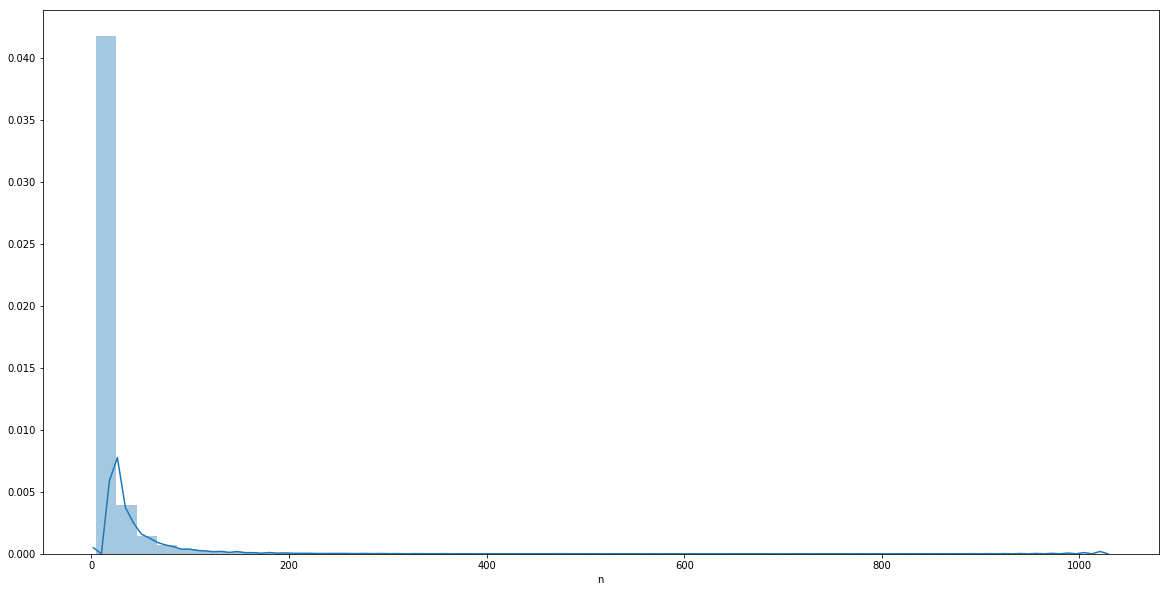

In [130]:
#looks like there's a decent amount of reviews per product
plt.figure(figsize=(20,10))
sns.distplot(df_music.groupby('asin')['reviewerID'].count().rename('n').reset_index().sort_values('n', ascending=False)['n'])

In [5]:
#Transform each reviewer into an index
users_list = df_music['reviewerName'].unique()
users_index = {user: idx for idx, user in enumerate(users_list)}
#tranform each prod into an index
prod_list = df_music['title'].unique()
prod_index = {prod: idx for idx, prod in enumerate(prod_list)}

In [137]:
users_list[0], prod_list[0]

('Brent Trafton', 'Goodbye Worries')

In [138]:
prod_index['Goodbye Worries'], users_index['Brent Trafton']

(0, 0)

## Build separate user and product matrices

In [226]:
from fastai.collab import * 

In [7]:
review_df_sub = df_music[['reviewerName', 'asin', 'overall', 'title']]
#Insert reviewer id into dataset
review_df_sub['reviewerID'] = review_df_sub['reviewerName'].apply(lambda x: users_index[x])
review_df_sub = review_df_sub.drop('reviewerName', axis=1)
review_df_sub.head()
data = CollabDataBunch.from_df(review_df_sub[['reviewerID', 'asin', 'overall', 'title']]
                               , seed=42,bs=64,num_workers=0, item_name='title')

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [176]:
data.show_batch()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


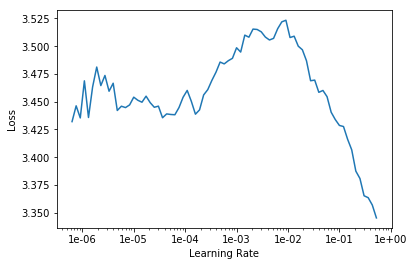

In [142]:
y_range = [0,5.5]
learn = collab_learner(data, n_factors=40, y_range=y_range, wd=1e-1)
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [143]:
learn.fit_one_cycle(2, 1e-2)

In [144]:
learn.save('dotprod')
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(69822, 40)
  (i_weight): Embedding(42417, 40)
  (u_bias): Embedding(69822, 1)
  (i_bias): Embedding(42417, 1)
)

In [39]:
g = df_music.groupby('title')['overall'].count()
top_music = g.sort_values(ascending=False).index.values[:1000]
top_music[:10]

array(['Greatest Hits', 'Best of', 'Ultimate Collection', 'St. Anger',
       'Dark Side of the Moon', 'Anthology', 'Gold', 'Fallen', 'Live',
       'Very Best of'], dtype=object)

In [154]:
music_bias = learn.weight(top_music, is_item=True)
music_bias.shape

torch.Size([1000, 40])

In [180]:
mean_ratings = df_music.groupby('title')['overall'].mean()
music_ratings = [(b, i, mean_ratings.loc[i]) for i,b in zip(top_music,music_bias)]

In [518]:
music_w = learn.weight(top_music, is_item=True)
music_w.shape

torch.Size([1000, 40])

In [533]:
music_w[0], music_ratings[0]

(tensor([ 0.0886, -0.0410, -0.0486,  0.0986, -0.0159, -0.0351, -0.3887, -0.3785,
          0.1620, -0.0631, -0.2019, -0.0128, -0.0767, -0.1874, -0.2147, -0.1671,
          0.0400, -0.2695,  0.1491, -0.0465,  0.0806,  0.1046,  0.0469, -0.1373,
          0.0055,  0.3506,  0.0722, -0.0937, -0.1777,  0.3994, -0.1202,  0.1064,
          0.0521, -0.0375, -0.0994,  0.0369,  0.3306,  0.0016, -0.1506,  0.0480]),
 (tensor([ 0.0886, -0.0410, -0.0486,  0.0986, -0.0159, -0.0351, -0.3887, -0.3785,
           0.1620, -0.0631, -0.2019, -0.0128, -0.0767, -0.1874, -0.2147, -0.1671,
           0.0400, -0.2695,  0.1491, -0.0465,  0.0806,  0.1046,  0.0469, -0.1373,
           0.0055,  0.3506,  0.0722, -0.0937, -0.1777,  0.3994, -0.1202,  0.1064,
           0.0521, -0.0375, -0.0994,  0.0369,  0.3306,  0.0016, -0.1506,  0.0480]),
  'Greatest Hits',
  4.376143292682927))

In [179]:
music_w[0]

tensor([ 0.0886, -0.0410, -0.0486,  0.0986, -0.0159, -0.0351, -0.3887, -0.3785,
         0.1620, -0.0631, -0.2019, -0.0128, -0.0767, -0.1874, -0.2147, -0.1671,
         0.0400, -0.2695,  0.1491, -0.0465,  0.0806,  0.1046,  0.0469, -0.1373,
         0.0055,  0.3506,  0.0722, -0.0937, -0.1777,  0.3994, -0.1202,  0.1064,
         0.0521, -0.0375, -0.0994,  0.0369,  0.3306,  0.0016, -0.1506,  0.0480])

In [158]:
music_pca = music_w.pca(2)
music_pca.shape

torch.Size([1000, 2])

In [159]:
fac0,fac1 = music_pca.t()
music_comp = [(f, i) for f,i in zip(fac0, top_music)]

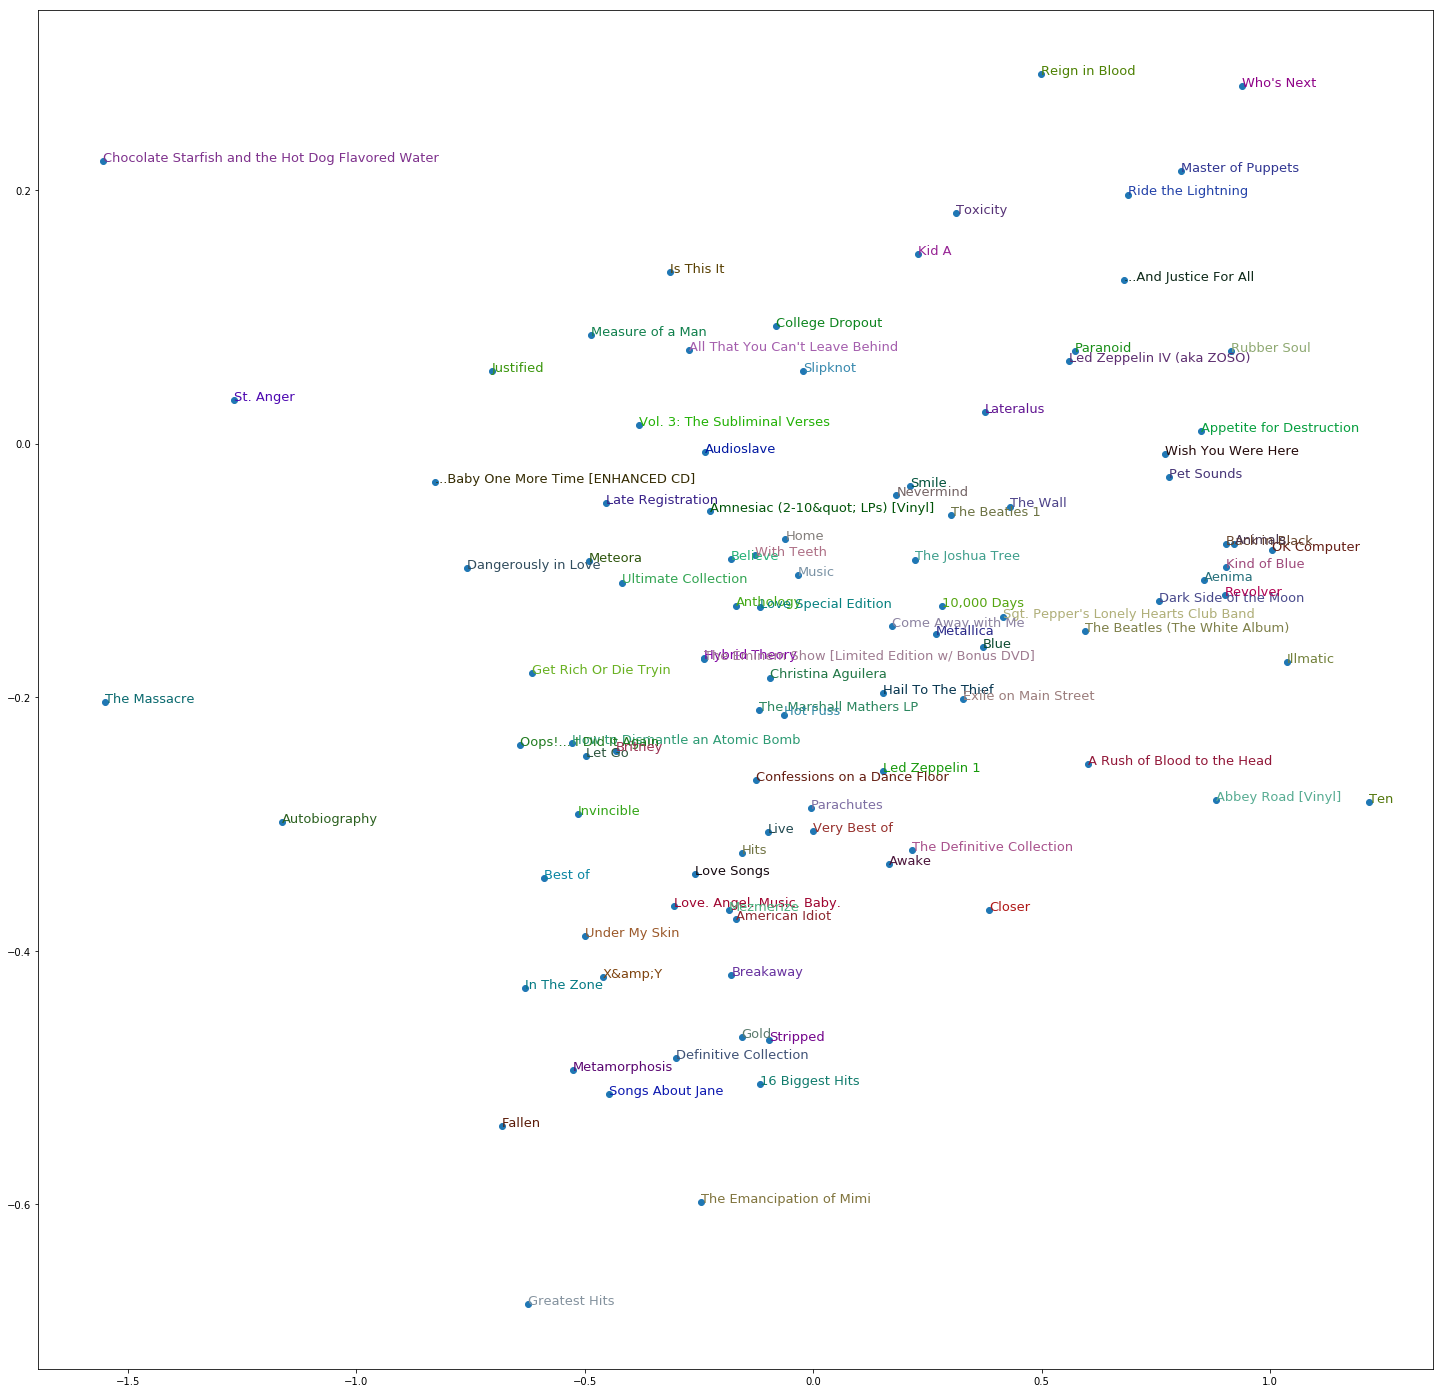

In [701]:
idxs = np.random.choice(len(top_music), 200, replace=False)
idxs = list(range(100))
X = fac0[idxs]
Y = fac1[idxs]
plt.figure(figsize=(25,25))
plt.scatter(X, Y)
for i, x, y in zip(top_music[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=13)
plt.show()

The autoecoder seems to have picked up general music genre and tastes.
Having slayer and metallica in the top right and the music getting softer as you travel down vertically.

## Unpacking the embedding model and rewriting

'CollabDataBunch' is a class that transforms a dataframe into a split of users and items into separate tensors, and splits into training and testing/validation sets
We split these into separate dataframes in order to save memory and computation. The alternative is to have one big matrix and use one hot encoding (slower).

In [516]:
#Transform each reviewer into an index
users_list = df_music['reviewerName'].unique()
users_index = {user: idx for idx, user in enumerate(users_list)}
#tranform each prod into an index
prod_list = df_music['title'].unique()
prod_index = {prod: idx for idx, prod in enumerate(prod_list)}

In [ ]:
#get a simple dataframe in order
review_df_sub = df_music[['reviewerName', 'asin', 'overall', 'title']]
review_df_sub['reviewerID'] = review_df_sub['reviewerName'].apply(lambda x: users_index[x]).astype('int')
review_df_sub['prodID'] = review_df_sub['title'].apply(lambda x: prod_index[x]).astype('int')
review_df_sub = review_df_sub.drop('reviewerName', axis=1)
review_df_sub.head()

In [518]:
prod_list = review_df_sub['prodID'].unique()
prod_index = {prod: idx for idx, prod in enumerate(prod_list)}

In [574]:
# %timeit review_df_sub[~(review_df_sub.set_index(['reviewerID', 'prodID']).index.isin(rm_list))]
# %timeit review_df_sub[review_df_sub[['reviewerID', 'prodID']].apply(lambda a: f(*a) in rm_list)]
review_df_sub.set_index(['reviewerID', 'prodID']).isin(rm_list)

asin  overall  title
reviewerID prodID                       
0          0       False    False  False
1          0       False    False  False
2          0       False    False  False
3          0       False    False  False
4          0       False    False  False
5          0       False    False  False
6          0       False    False  False
7          0       False    False  False
8          0       False    False  False
9          1       False    False  False
10         1       False    False  False
11         1       False    False  False
12         1       False    False  False
13         1       False    False  False
14         1       False    False  False
15         1       False    False  False
16         1       False    False  False
17         1       False    False  False
18         1       False    False  False
19         1       False    False  False
20         2       False    False  False
           2       False    False  False
21         2       False    False  False
22         2       False    False  False
23         2       False    False  False
24         2       False    False  False
25         2       False    False  False
26         2       False    False  False
27         2       False    False  False
28         2       False    False  False
...                  ...      ...    ...
66352      40886   False    False  False
31977      40886   False    False  False
65582      40886   False    False  False
68767      40886   False    False  False
4070       40886   False    False  False
30954      40886   False    False  False
69773      40886   False    False  False
57039      40886   False    False  False
36656      40886   False    False  False
68786      40886   False    False  False
52418      40886   False    False  False
12069      40886   False    False  False
8599       40886   False    False  False
9696       40886   False    False  False
30705      40886   False    False  False
67919      40886   False    False  False
53844      40886   False    False  False
42069      40886   False    False  False
20759      40886   False    False  False
54245      40886   False    False  False
11028      40886   False    False  False
42454      40886   False    False  False
15771      40886   False    False  False
36228      40886   False    False  False
22545      40886   False    False  False
35607      40886   False    False  False
41254      40886   False    False  False
23512      40886   False    False  False
27130      40886   False    False  False
59315      40886   False    False  False

[1049710 rows x 3 columns]

In [514]:
import random #for random sampling of the data for batches
#We just want to start by creating a simple batch loader.
def batch_loader(df, b_size=64, rm_list=[]):
    #remove from the df the list of items that have already been loaded
    #grab a sample of the batchsize specified
    #revised batch after removing previous batch ids
    df_revised = df[~(df.set_index(['reviewerID', 'prodID']).index.isin(rm_list))]

    if b_size>len(df_revised):
        b_size=len(df_revised)
        
    batch = df_revised[['reviewerID', 'prodID', 'overall']].sample(b_size).values
    #switch ids back to int
    yield {'user': batch[:, 0].astype('int'), 'prod': batch[:, 1].astype('int')}, batch[:, 2]

In [519]:
# Show a few example training pairs
a, b = next(batch_loader(review_df_sub, 10))
for label, user_id, prod_id in zip(b, a['user'], a['prod']):
    print(f'user: {users_list[(user_id)]:30} prod: {prod_list[(prod_id)]:30} review: {label}')

user: Ben C-F                        prod:                          29451 review: 5.0
user: gio                            prod:                          25077 review: 4.0
user: D-Lord "D-Ndependent 1"        prod:                          40886 review: 5.0
user: C. J. Schwartz "Charlie :)"    prod:                          40886 review: 4.0
user: Dave Childress                 prod:                          11398 review: 5.0
user: John Alapick                   prod:                           2201 review: 4.0
user: Cory G.                        prod:                           8859 review: 5.0
user: A. Zowie                       prod:                          40886 review: 3.0
user: L.A. Scene                     prod:                           3842 review: 4.0
user: Morton                         prod:                           6031 review: 4.0


In [724]:
#we need weights for the: Users, products (music), bias for Users, and bias for products (music).
#so 4 parameters.
from torch.nn import Module, Embedding, MSELoss
from torch.optim import *
from torch.autograd import Variable
import torch 

class EmbeddingModel(Module):
    #initiate the weights and biases of user and product.
    #these need to be leared through forward pass
    def __init__(self, n_dims, n_users, n_items, y_range):
        super(EmbeddingModel, self).__init__()
        self.y_range=y_range #the review range (0-5+)
        (self.u_weight, self.i_weight, self.u_bias, self.i_bias) = [Embedding(*o) for o in [
            (n_users, n_dims), #user weights
            (n_items, n_dims), #product weights
            (n_users,1), #user bias
            (n_items,1)]] #product bias
    def forward(self, users, items):
        matmul = self.u_weight(users)* self.i_weight(items)
        print(self.u_weight(users).shape, self.u_weight(items).shape)
        out = matmul.sum(1) + self.u_bias(users).squeeze() + self.i_bias(items).squeeze()
        #run output through a sigmoid
        return torch.sigmoid(out) * (self.y_range[1]-self.y_range[0]) + self.y_range[0]

In [725]:
#learning 40 dimensions per uer and product (expanding the feature space from 1 per to 40 per)
model = EmbeddingModel(n_dims=40, n_users=len(users_list),
               n_items=len(prod_list), y_range=[0,5.5])
#the weightof the first user in the batch:
model.u_weight(torch.tensor([0]))
#the weight of the first prod in the batch:
model.i_weight(torch.tensor([0]))

tensor([[ 0.6923, -1.8021,  0.2917, -0.1401, -0.2963,  1.0634,  0.9661,  1.3455,
         -0.2129, -1.3464,  0.2913, -0.4736, -0.1246,  0.7146, -0.0665, -0.6813,
         -0.1665, -0.6864, -0.5699,  0.4588,  0.2600,  1.9701,  0.2895,  0.8394,
         -1.0298,  1.5691,  0.9450, -0.7045, -0.5730,  0.1228,  0.1744,  0.8659,
          0.5910, -0.8350, -0.2422,  1.0450,  0.0403, -0.0707,  0.6609, -1.3931]],
       grad_fn=<EmbeddingBackward>)

In [726]:
model.parameters

<bound method Module.parameters of EmbeddingModel(
  (u_weight): Embedding(69910, 40)
  (i_weight): Embedding(42418, 40)
  (u_bias): Embedding(69910, 1)
  (i_bias): Embedding(42418, 1)
)>

In [727]:
#example forward pass
a, b = next(batch_loader(review_df_sub, 64))
model.forward(torch.tensor(a['user']).long(),torch.tensor(a['prod']).long())

torch.Size([64, 40]) torch.Size([64, 40])


tensor([6.4978e-01, 5.2101e+00, 5.2071e+00, 5.6445e-01, 5.6672e-01, 5.6107e-05,
        4.0263e-03, 9.7331e-01, 5.0090e+00, 1.4971e+00, 3.4908e+00, 5.4979e+00,
        8.5338e-01, 1.8625e-01, 4.0219e+00, 4.6975e+00, 9.7671e-04, 5.3561e+00,
        4.6636e+00, 4.8002e+00, 5.4894e+00, 5.4855e+00, 4.0732e+00, 5.8693e-01,
        5.4980e+00, 5.4970e+00, 5.5923e-01, 1.8038e-01, 7.6278e-03, 7.2195e-02,
        8.5714e-04, 3.9271e-01, 2.1205e-02, 2.1920e+00, 5.0756e+00, 5.4994e+00,
        4.7749e+00, 4.7524e-01, 5.4817e+00, 1.3609e+00, 5.4951e+00, 5.4541e+00,
        5.5000e+00, 8.1535e-01, 1.4891e-01, 2.0825e-01, 4.3205e+00, 5.3859e+00,
        6.8997e-06, 5.3905e+00, 7.6713e-02, 5.4991e+00, 5.1797e+00, 5.4995e+00,
        2.7286e+00, 5.4029e+00, 5.4532e+00, 9.3071e-01, 1.6743e-05, 5.4378e+00,
        5.3224e+00, 5.2380e+00, 4.6895e+00, 5.4996e+00],
       grad_fn=<AddBackward0>)

In [580]:
#we have a simple architecture now (embeddings). 
#we need to build a learner to train the model with
# Loop over epochs
import math
import torch.nn.functional as F
max_epochs = math.ceil(len(review_df_sub) / 64)
# max_epochs = 100
optimizer = Adam(model.parameters(),lr=1e-2,weight_decay=0.01)
optimizer.zero_grad()
loss_values = []
rm_list = []
for epoch in range(max_epochs):
    # Training
    loss= 0.
    for local_batch, local_labels in batch_loader(review_df_sub, rm_list=rm_list):
        #pass in the indices of the batch user and prod 
        output = model.forward(torch.tensor(local_batch['user']).long(), torch.tensor(local_batch['prod']).long())
        #compare outputs of batch with n=64 to label and compute the loss
        labels = torch.from_numpy(local_labels).float()
        #calculate the loss
        loss = F.mse_loss(output, labels, True)
        #update the parameters using backpropogation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    #keep a record of batched items, to remove from each epoch
    rm_list.extend(list(zip([(i,j) for i,j in local_batch.items()][0][1].tolist(),
                            [(i,j) for i,j in local_batch.items()][1][1].tolist())))
    #every so often we need to check if the model is working so we return total loss to get an idea of that
    #we'll do this every 100 epochs
    if epoch % 200 == 0:
        loss= 0.
        #load full dataset and run forward pass
        full_batch, full_labels = next(batch_loader(review_df_sub, b_size=len(review_df_sub), rm_list=np.array([])))
        output_full = model.forward(torch.tensor(full_batch['user']).long(), torch.tensor(full_batch['prod']).long())
        #compare outputs of batch with n=64 to label and compute the loss
        outputs_full, labels_full = Variable(torch.tensor(output_full), requires_grad=False), Variable(torch.from_numpy(full_labels).float())
        #calculate the loss
        loss = loss_function(outputs_full, labels_full)
        loss_values.append(loss.data.item())
    

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTe

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTe

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anacon

KeyboardInterrupt: 

In [586]:
epoch, max_epochs

(13365, 16402)

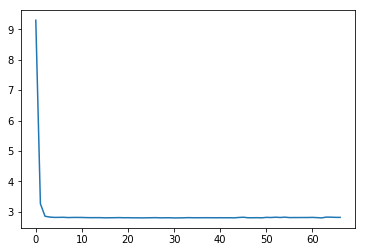

In [581]:
plt.plot(loss_values)

In [ ]:
torch.save(model.state_dict(), 'dotprod_scratch2')

# It's training - but far too slow!
- It's the data loading stage that's bottlenecking our training!
- We need to switch to something faster.. like pytorch data loaders.
- We might need to change the learning rate too as we're using small batches
- initialise the user and item weights better

In [14]:
a = np.load('merged_album_data.pkl')
#null album titles are no use for us
a = a[~(a['title'].isnull())]
#drop duplicate reviews
a = a.drop_duplicates(subset=['reviewerID', 'asin'])
users_list = a['reviewerID'].unique()
users_index = {user: idx for idx, user in enumerate(users_list)}
#tranform each prod into an index
prod_list = a['title'].unique()
prod_index = {prod: idx for idx, prod in enumerate(prod_list)}
a = a[['reviewerID', 'asin', 'overall', 'title']]
a['reviewerID'] = a['reviewerID'].apply(lambda x: users_index[x]).astype('int')
a['prodID'] = a['title'].apply(lambda x: prod_index[x]).astype('int')
a = a[['reviewerID', 'prodID', 'overall']]
a.to_pickle('merged_album_data_model.pkl')

In [3]:
from torch.utils.data import Dataset, DataLoader
#create a custom data dataset / dataloader
class music_dataset(Dataset):

    def __init__(self):
        xy = np.load('merged_album_data_model.pkl')
        self.u = np.array(xy.iloc[:,0:1])
        self.p = np.array(xy.iloc[:,1:2])
        self.up = np.array(xy.iloc[:,0:2])
        self.y = np.array(xy.iloc[:,2:])
    def __len__(self):
        return len(self.up)

    def __getitem__(self, idx):
        return self.up[idx], self.y[idx]
df_new = music_dataset()
ds = DataLoader(df_new, batch_size=1, shuffle=True)

In [4]:
#we need weights for the: Users, products (music), bias for Users, and bias for products (music).
#so 4 parameters.
from torch.nn import Module, Embedding, MSELoss
from torch.optim import *
from torch.autograd import Variable
import torch 

class EmbeddingModel(Module):
    #initiate the weights and biases of user and product.
    #these need to be leared through forward pass
    def __init__(self, n_dims, n_users, n_items, y_range):
        super(EmbeddingModel, self).__init__()
        self.y_range=y_range #the review range (0-5+)
        (self.u_weight, self.i_weight, self.u_bias, self.i_bias) = [Embedding(*o) for o in [
            (n_users, n_dims), #user weights
            (n_items, n_dims), #product weights
            (n_users,1), #user bias
            (n_items,1)]] #product bias
        #initialise the weights to between 0 and 0.05
        self.u_weight.weight.data.uniform_(0,0.05)
        self.i_weight.weight.data.uniform_(0,0.05)
        self.u_bias.weight.data.uniform_(0,0.05)
        self.i_bias.weight.data.uniform_(0,0.05)
    def forward(self, users, items):
        matmul = self.u_weight(users)* self.i_weight(items)
        out = matmul.sum(1) + self.u_bias(users).squeeze() + self.i_bias(items).squeeze()
        #run output through a sigmoid
        return torch.sigmoid(out) * (self.y_range[1]-self.y_range[0]) + self.y_range[0]
model = EmbeddingModel(n_dims=40, n_users=len(np.unique(df_new.u)),
           n_items=len(np.unique(df_new.p)), y_range=[0,5.5])

In [5]:
model.parameters

<bound method Module.parameters of EmbeddingModel(
  (u_weight): Embedding(71493, 40)
  (i_weight): Embedding(42417, 40)
  (u_bias): Embedding(71493, 1)
  (i_bias): Embedding(42417, 1)
)>

In [261]:
#we have a simple architecture now (embeddings). 
#we need to build a learner to train the model with
# Loop over epochs
#https://github.com/devforfu/pytorch_playground/blob/master/movielens.ipynb
import math
import torch.nn.functional as F
df_new = music_dataset()
ds = DataLoader(df_new, batch_size=64, shuffle=True)

model = EmbeddingModel(n_dims=40, n_users=len(np.unique(df_new.u)),
           n_items=len(np.unique(df_new.p)), y_range=[0,5.5])

max_epochs = 2
optimizer = Adam(model.parameters(),lr=1e-2,weight_decay=1e-4)
optimizer.zero_grad()
full_loss_df = []
loss_values = []
for epoch in range(max_epochs):
    # Training
    loss= 0.
    for local_index, local_batch in enumerate(ds, 0):
        loss= 0.
        #pass in the indices of the batch user and prod 
        output = model.forward(local_batch[0][:,0:1].squeeze(1).long(), local_batch[0][:,1:2].squeeze(1).long())
        #compare outputs of batch with n=64 to label and compute the loss
        labels = local_batch[1].float()
        #calculate the loss
        a = model.u_weight(local_batch[0][:,0:1].squeeze(1).long()[0]).clone()
        loss = F.mse_loss(output, labels)
        #update the parameters using backpropogation
        loss.backward()
        optimizer.step()
        b = model.u_weight(local_batch[0][:,0:1].squeeze(1).long()[0]).clone()
        #check if it's trained. if it hasn't then stop the training
        assert torch.equal(a.data, b.data)==False
        optimizer.zero_grad()
        loss_values.append(loss.data.item())
    #every so often we need to check if the model is working so we return total loss to get an idea of that
    #we'll do this every 100 epochs
    #load full dataset and run forward pass
    output_full = Variable(model.forward(torch.tensor(df_new.up[:,0:1].squeeze(1)).long(),
                                 torch.tensor(df_new.up[:,1:2].squeeze(1)).long()), requires_grad=False)
    full_loss = F.mse_loss(output_full, Variable(torch.tensor(df_new.y).float().squeeze(1)))        #calculate the loss
    full_loss_df.append(full_loss.data.item())    

In [331]:
optimizer.zero_grad()
output = model.forward(local_batch[0][:,0:1].squeeze(1).long(), local_batch[0][:,1:2].squeeze(1).long())
print(output[0], labels[0])
print(model.u_weight(local_batch[0][:,0:1].squeeze(1).long()[0]).clone())
loss = F.mse_loss(output, labels)
loss.backward()
optimizer.step()
print(model.u_weight(local_batch[0][:,0:1].squeeze(1).long()[0]).clone())
a.data, b.data

tensor(2.8454, grad_fn=<SelectBackward>) tensor([5.])
tensor([0.0322, 0.0113, 0.0298, 0.0481, 0.0120, 0.0168, 0.0214, 0.0087, 0.0170,
        0.0074, 0.0369, 0.0025, 0.0041, 0.0023, 0.0472, 0.0110, 0.0348, 0.0310,
        0.0499, 0.0392, 0.0225, 0.0151, 0.0093, 0.0411, 0.0264, 0.0366, 0.0327,
        0.0337, 0.0215, 0.0434, 0.0371, 0.0447, 0.0446, 0.0044, 0.0110, 0.0184,
        0.0128, 0.0428, 0.0140, 0.0095], grad_fn=<CloneBackward>)
tensor([0.0322, 0.0113, 0.0298, 0.0481, 0.0120, 0.0168, 0.0214, 0.0087, 0.0170,
        0.0074, 0.0369, 0.0025, 0.0041, 0.0023, 0.0472, 0.0110, 0.0348, 0.0310,
        0.0499, 0.0392, 0.0225, 0.0151, 0.0093, 0.0411, 0.0264, 0.0366, 0.0327,
        0.0337, 0.0215, 0.0434, 0.0371, 0.0447, 0.0446, 0.0044, 0.0110, 0.0184,
        0.0128, 0.0428, 0.0140, 0.0095], grad_fn=<CloneBackward>)


(tensor([5.3226e-08, 7.1428e-08, 3.6124e-09, 7.1262e-08, 1.0316e-07, 2.8707e-08,
         1.1201e-07, 8.6477e-08, 7.6867e-08, 8.2708e-08, 3.7890e-08, 9.1241e-08,
         7.1386e-08, 4.8477e-08, 1.1426e-07, 2.5184e-08, 6.6883e-08, 9.7574e-08,
         2.3497e-09, 2.9525e-08, 6.7524e-08, 2.7868e-08, 5.4604e-09, 2.6435e-08,
         1.1736e-07, 7.4677e-09, 4.2641e-08, 4.5358e-08, 1.1807e-07, 9.8967e-08,
         3.1058e-08, 1.0989e-07, 3.3415e-08, 1.1830e-07, 3.9773e-08, 7.2772e-08,
         1.6685e-08, 6.3751e-08, 3.5708e-08, 8.9771e-08]),
 tensor([5.4163e-08, 7.3461e-08, 5.1187e-09, 7.2207e-08, 1.0488e-07, 3.0897e-08,
         1.1399e-07, 8.7338e-08, 7.8557e-08, 8.4459e-08, 3.8602e-08, 9.2065e-08,
         7.2183e-08, 5.0328e-08, 1.1562e-07, 2.6812e-08, 6.9107e-08, 9.9172e-08,
         4.2419e-09, 3.1824e-08, 6.8271e-08, 3.0157e-08, 6.9322e-09, 2.8047e-08,
         1.1824e-07, 9.1458e-09, 4.4453e-08, 4.5928e-08, 1.2017e-07, 1.0081e-07,
         3.2614e-08, 1.1125e-07, 3.5695e-08, 1.193

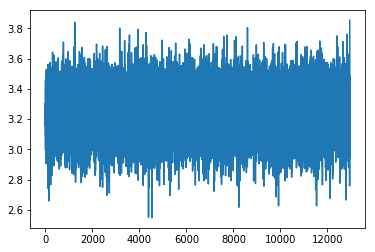

In [332]:
plt.plot(loss_values)

In [333]:
full_loss_df

[3.255498170852661, 3.255575180053711]

# This accuracy is a lot lower than fastai!
- Probably becuase fastai is using fit_on_cycle (https://docs.fast.ai/callbacks.one_cycle.html)
- Replicate this now.
- UPDATE: a learning rate scheduler helped alot to decrease the loss.
- small weight decay parameters makes the loss lower, and actually setting it to 1e-5 in this instance performed the best!

In [140]:
from torch.optim.lr_scheduler import _LRScheduler
class CyclicLR(_LRScheduler):
    
    def __init__(self, optimizer, schedule, last_epoch=-1):
        assert callable(schedule)
        self.schedule = schedule
        super().__init__(optimizer, last_epoch)

    def get_lr(self):
        return [self.schedule(self.last_epoch, lr) for lr in self.base_lrs]
def triangular(step_size, max_lr, method='triangular', gamma=0.99):
    
    def scheduler(epoch, base_lr):
        period = 2 * step_size
        cycle = math.floor(1 + epoch/period)
        x = abs(epoch/step_size - 2*cycle + 1)
        delta = (max_lr - base_lr)*max(0, (1 - x))

        if method == 'triangular':
            pass  # we've already done
        elif method == 'triangular2':
            delta /= float(2 ** (cycle - 1))
        elif method == 'exp_range':
            delta *= (gamma**epoch)
        else:
            raise ValueError('unexpected method: %s' % method)
            
        return base_lr + delta
        
    return scheduler 
def cosine(t_max, eta_min=0):
    
    def scheduler(epoch, base_lr):
        t = epoch % t_max
        return eta_min + (base_lr - eta_min)*(1 + math.cos(math.pi*t/t_max))/2
    
    return scheduler

In [380]:
#we have a simple architecture now (embeddings). 
#we need to build a learner to train the model with
# Loop over epochs
#https://github.com/devforfu/pytorch_playground/blob/master/movielens.ipynb
import math
import torch.nn.functional as F
df_new = music_dataset()
ds = DataLoader(df_new, batch_size=64, shuffle=True)

model = EmbeddingModel(n_dims=40, n_users=len(np.unique(df_new.u)),
           n_items=len(np.unique(df_new.p)), y_range=[0,5.5])

max_epochs = 2
lr=1e-2
optimizer = Adam(model.parameters(),lr=lr,weight_decay=1e-5)
iterations_per_epoch = len(ds)
scheduler = CyclicLR(optimizer, cosine(t_max=iterations_per_epoch * 2, eta_min=lr/10))
optimizer.zero_grad()
full_loss_df = []
loss_values = []
for epoch in range(max_epochs):
    # Training
    loss= 0.
    for local_index, local_batch in enumerate(ds, 0):
        loss= 0.
        #pass in the indices of the batch user and prod 
        output = model.forward(local_batch[0][:,0:1].squeeze(1).long(), local_batch[0][:,1:2].squeeze(1).long())
        #compare outputs of batch with n=64 to label and compute the loss
        labels = local_batch[1].float()
        #calculate the loss
        a = model.u_weight(local_batch[0][:,0:1].squeeze(1).long()[0]).clone()
        loss = F.mse_loss(output, labels)
        scheduler.step()
        #update the parameters using backpropogation
        loss.backward()
        optimizer.step()
        b = model.u_weight(local_batch[0][:,0:1].squeeze(1).long()[0]).clone()
        #check if it's trained. if it hasn't then stop the training
        assert torch.equal(a.data, b.data)==False
        optimizer.zero_grad()
        loss_values.append(loss.data.item())
        if len(loss_values) % 100 == 0:
            print(loss.data.item())
    #every so often we need to check if the model is working so we return total loss to get an idea of that
    #we'll do this every 100 epochs
    #load full dataset and run forward pass
    output_full = Variable(model.forward(torch.tensor(df_new.up[:,0:1].squeeze(1)).long(),
                                 torch.tensor(df_new.up[:,1:2].squeeze(1)).long()), requires_grad=False)
    full_loss = F.mse_loss(output_full, Variable(torch.tensor(df_new.y).float().squeeze(1)))        #calculate the loss
    full_loss_df.append(full_loss.data.item())    

3.0728089809417725
3.016237497329712
3.2608449459075928
3.8908300399780273
3.59647798538208
3.487596035003662
3.6084842681884766
3.5421085357666016
3.903959035873413
3.5648977756500244
3.7149014472961426
3.826587677001953
2.9342291355133057
3.7577602863311768
3.84158992767334
3.646324634552002
3.6888821125030518
3.598374843597412
3.6774826049804688
2.944668769836426
3.512700319290161
3.3429629802703857
2.9498746395111084
3.3349013328552246
3.2395524978637695
3.6418235301971436
3.650999069213867
3.569780111312866
3.463350772857666
3.086395502090454
3.1481471061706543
3.3472185134887695
3.5629396438598633
3.5081722736358643
3.3075079917907715
3.7963967323303223
3.0300188064575195
3.3345658779144287
3.2370219230651855
3.501095771789551
3.4808123111724854
3.5108063220977783
2.907618284225464
3.5445613861083984
3.370091438293457
3.4097697734832764
3.4592161178588867
3.8246986865997314
3.9946725368499756
3.850738286972046
3.1977732181549072
3.5503315925598145
3.9889075756073
3.35007619857788

2.4507217407226562
2.680478096008301
2.6981074810028076
2.3029372692108154
2.2944843769073486
2.5286405086517334
2.3907368183135986
2.4859368801116943
2.511337995529175
2.403686285018921
2.4425721168518066
2.3561365604400635
2.7720823287963867
2.3375725746154785
2.2665061950683594
2.614118814468384
2.365922451019287
2.4545719623565674
2.756011486053467
2.3771328926086426
2.610527992248535
2.04583477973938
2.4272620677948
2.253411054611206
2.484424591064453
2.5947306156158447
2.2710049152374268
2.5067975521087646
2.2361319065093994
2.775296926498413
2.4798784255981445
2.371781587600708
2.459383964538574
2.579451560974121
2.155514717102051
2.20593523979187
2.505098819732666
2.225440263748169
2.523232936859131
2.2072975635528564
2.4778552055358887
2.1671016216278076
2.461068630218506
1.9249958992004395
2.272848129272461
2.3917884826660156
2.4082233905792236
2.542938709259033
2.628582239151001
2.6742804050445557
2.5665361881256104
2.6358914375305176
2.337320566177368
1.9142953157424927
2.4

1.9198124408721924
1.983573079109192
2.018996238708496
1.8768062591552734
2.037688732147217
1.8439358472824097
1.978087067604065
1.8742344379425049
1.817239761352539
1.8266196250915527
1.977583885192871
1.9198004007339478
2.0251924991607666
1.9067649841308594
1.6232855319976807
1.6742029190063477
1.5997906923294067
1.8023743629455566
2.1453847885131836
2.0783441066741943
1.9582605361938477
1.784042239189148
1.9277907609939575
1.7270874977111816
1.8840028047561646
1.9436249732971191
1.9780224561691284
1.8313435316085815
1.7462276220321655
1.9127031564712524
1.8921360969543457
2.1290283203125
1.7857365608215332
1.947575330734253
1.963301658630371
1.5631109476089478
1.5639538764953613
2.0114972591400146
1.982714056968689
1.856087565422058
2.0924947261810303
1.6350592374801636
1.8287595510482788
1.9723992347717285
2.0325024127960205
1.9946719408035278
1.943937063217163
1.8019839525222778
1.7452945709228516
2.359513521194458
2.0173048973083496
1.870617389678955
1.8350355625152588
1.85714197

1.3269462585449219
1.7687188386917114
1.7672436237335205
1.8410968780517578
1.8643437623977661
2.211350917816162
1.837563157081604
1.5474766492843628
1.4984909296035767
1.7454988956451416
1.8299241065979004
1.7713755369186401
1.7513349056243896
1.5443203449249268
1.8171385526657104
1.8617297410964966
1.5215595960617065
1.8669981956481934
1.5744493007659912
1.5881798267364502
1.8399114608764648
1.9752930402755737
1.5788930654525757
1.8336541652679443
1.635957956314087
1.7554439306259155
1.672640085220337
1.703599452972412
1.42048180103302
1.8797343969345093
1.578307867050171
1.6266313791275024
1.6237729787826538
2.2010936737060547
1.5951405763626099
1.5512784719467163
1.7123795747756958
1.8750356435775757
1.3481789827346802
1.8138209581375122
1.859241008758545
1.8422309160232544
2.04769229888916
1.654344081878662
1.652761697769165
1.8907663822174072
1.3121168613433838
1.5251435041427612
1.617890477180481
1.3553694486618042
2.1916537284851074
1.7003514766693115
1.6990447044372559
1.47810

1.4447191953659058
1.5804216861724854
1.9127051830291748
1.3063981533050537
1.771612524986267
1.5857940912246704
1.6255775690078735
1.7245678901672363
1.1675883531570435
1.4596067667007446
1.284435510635376
1.8722003698349
1.5904170274734497
1.3759331703186035
1.6694393157958984
1.7447230815887451
1.3681336641311646
1.837438941001892
0.9980158805847168
1.2806320190429688
1.486945390701294
1.3210995197296143
1.6533923149108887
1.6165999174118042
1.2770277261734009
1.4901535511016846
1.5057787895202637
1.7289332151412964
1.190859317779541
1.6015090942382812
1.7102196216583252
2.046159267425537
1.4654735326766968
1.1529825925827026
2.1568267345428467
1.2824690341949463
1.5568615198135376
1.4405522346496582
1.3476797342300415
1.4148948192596436
1.9888603687286377
1.5209646224975586
1.2192333936691284
1.643484115600586
1.4116451740264893
1.210854172706604
1.647538661956787
1.4093071222305298
1.58878493309021
1.5780309438705444
1.8590383529663086
1.429050326347351
1.498114824295044
1.4141533

1.186781883239746
1.3158634901046753
1.384059190750122
1.33168363571167
1.7228201627731323
1.3961797952651978
1.318860411643982
1.3484128713607788
1.3530031442642212
1.3902441263198853
1.4975272417068481
1.2157244682312012
1.150553822517395
1.5801974534988403
1.6849491596221924
1.4485622644424438
1.3049139976501465
1.4602330923080444
1.8084851503372192
1.9846972227096558
1.667302131652832
1.2716851234436035
1.4492162466049194
1.401837944984436
1.225761890411377
2.2360565662384033
1.1371126174926758
1.3000030517578125
1.7883820533752441
1.5285364389419556
1.403794765472412
1.3995826244354248
1.6254311800003052
1.5822925567626953
1.5987662076950073
1.207483172416687
1.0832045078277588
1.5286332368850708
1.572420597076416
1.7677303552627563
1.411228895187378
1.073905110359192
1.4453123807907104
1.325430989265442
1.4759613275527954
1.0492362976074219
1.282698631286621
1.825221061706543
1.5903502702713013
0.9818335175514221
1.1631889343261719
1.6417386531829834
1.3797001838684082
1.74293661

1.265652060508728
1.5686668157577515
1.5465147495269775
1.4824384450912476
1.1510593891143799
1.1689327955245972
1.6961262226104736
1.1251256465911865
1.271471619606018
1.6121163368225098
1.2590069770812988
1.2267284393310547
1.4897114038467407
1.4104201793670654
1.083431363105774
1.2326329946517944
1.4015692472457886
1.7103049755096436
1.3779480457305908
1.2068912982940674
1.3708914518356323
1.2625397443771362
1.5388410091400146
1.334749460220337
1.2559484243392944
1.0572375059127808
1.3278340101242065
1.774640679359436
1.0461208820343018
1.4913966655731201
1.5202890634536743
2.0100910663604736
1.3196359872817993
1.4908804893493652
1.1321525573730469
1.055485725402832
1.751395344734192
1.5998857021331787
1.0925233364105225
1.4341322183609009
1.5372817516326904
1.465309977531433
1.5278769731521606
1.489107370376587
1.165061116218567
1.3607267141342163
1.363142967224121
1.3146748542785645
1.7965260744094849
1.335664987564087
1.4164774417877197
1.2090812921524048
1.4173811674118042
1.186

1.473064661026001
1.3289461135864258
1.452354907989502
1.5284557342529297
1.4152792692184448
1.5119638442993164
1.6428492069244385
1.400739073753357
1.3346267938613892
1.5063807964324951
1.1174602508544922
1.2090635299682617
1.3075931072235107
1.3592103719711304
1.3645929098129272
1.2381069660186768
1.3279200792312622
1.460202932357788
1.4383502006530762
1.4259508848190308
1.8964896202087402
1.17879319190979
1.4151523113250732
1.0464683771133423
1.4745314121246338
1.1643401384353638
1.2902334928512573
1.5276565551757812
1.0978730916976929
1.043365478515625
1.5458592176437378
1.19075608253479
1.203062653541565
1.3299658298492432
1.2968394756317139
1.2630401849746704
1.60503089427948
1.4026848077774048
0.8788182735443115
1.505615472793579
1.252235770225525
1.8281748294830322
1.1126353740692139
1.0559254884719849
1.4855059385299683
1.1835525035858154
1.241816759109497
1.3504817485809326
1.5350096225738525
1.3706111907958984
1.1618732213974
1.0803582668304443
1.6666452884674072
1.155454277

1.2780506610870361
1.518597960472107
0.9142383337020874
1.4237017631530762
1.4935675859451294
1.0365264415740967
1.0110208988189697
1.2765015363693237
1.5152034759521484
1.3121005296707153
1.3626809120178223
1.2656890153884888
1.3960199356079102
0.9348635673522949
1.3660613298416138
1.5851945877075195
1.381168246269226
1.561671495437622
1.3191839456558228
1.6316741704940796
1.3215358257293701
1.46402907371521
1.238384485244751
1.3636562824249268
0.9601160287857056
1.3275974988937378
1.1980260610580444
0.9248009920120239
1.0073505640029907
1.1752092838287354
1.5123144388198853
1.1424734592437744
1.4840455055236816
1.4580258131027222
1.5091133117675781
1.0167362689971924
1.73162841796875
1.3055800199508667
1.9689600467681885
1.0700064897537231
1.2794502973556519
1.3416026830673218
1.4510726928710938
1.0314801931381226
1.3129398822784424
1.4336546659469604
1.1978697776794434
1.4943077564239502
1.3374526500701904
1.5551410913467407
1.1795353889465332
1.3546818494796753
1.2386709451675415
1

0.9076951146125793
1.4286377429962158
1.417818546295166
1.443530559539795
1.4103679656982422
1.464868187904358
1.0292563438415527
1.7505123615264893
1.164560317993164
1.2948999404907227
1.9324941635131836
1.4018819332122803
1.4230985641479492
1.125719428062439
1.0263316631317139
1.5360041856765747
1.4094709157943726
0.9915903806686401
1.1682102680206299
1.44284188747406
1.7081712484359741
1.0430024862289429
1.074808120727539
1.19669771194458
1.3533599376678467
1.2503936290740967
1.2971338033676147
1.4943361282348633
1.588866949081421
1.3257513046264648
1.2526230812072754
1.1494476795196533
0.9186959266662598
1.0504183769226074
1.2396173477172852
1.1957558393478394
1.8941811323165894
1.4027211666107178
1.390013575553894
1.007201075553894
1.2094072103500366
1.4084606170654297
1.1245805025100708
1.1039977073669434
1.134848713874817
1.6382912397384644
0.818223237991333
1.4015653133392334
1.4883530139923096
1.91649329662323
1.3158748149871826
1.3607529401779175
1.1715940237045288
1.16927516

1.810833215713501
1.5345669984817505
1.190285325050354
1.0095723867416382
1.539075255393982
1.014625906944275
1.407883644104004
1.381981611251831
1.617407202720642
0.9333068132400513
0.9972735643386841
1.3755810260772705
1.3039841651916504
1.494418740272522
1.2288219928741455
1.0131516456604004
1.3869030475616455
1.7777388095855713
1.5434247255325317
1.038583517074585
1.0658679008483887
1.9712083339691162
1.1062384843826294
1.3414978981018066
1.4669383764266968
1.3799806833267212
1.8890825510025024
1.2111948728561401
0.9138699173927307
1.2811301946640015
1.5520203113555908
1.178321123123169
1.4410643577575684
1.990809440612793
1.495186686515808
1.4605330228805542
1.605463981628418
1.2088196277618408
1.2388005256652832
1.2511606216430664
1.681768536567688
0.8226554989814758
1.1392791271209717
1.0772333145141602
1.2809796333312988
1.6711716651916504
1.7929788827896118
1.6006863117218018
1.1665552854537964
1.5903654098510742
1.5754914283752441
1.6646779775619507
1.3046369552612305
1.19319

0.7302291393280029
1.5320708751678467
1.1788666248321533
0.9671450257301331
1.1108158826828003
1.7942169904708862
1.3214361667633057
1.8609144687652588
1.1508774757385254
1.0685021877288818
1.5586928129196167
1.2118990421295166
1.5742921829223633
1.2286826372146606
1.3405812978744507
1.7014964818954468
0.9632839560508728
1.0323143005371094
1.164805293083191
1.353812336921692
1.125658392906189
0.7700328230857849
1.4147891998291016
1.0742846727371216
1.2132704257965088
0.8274878859519958
1.0473088026046753
1.5265682935714722
1.3417390584945679
1.4162393808364868
1.050237774848938
1.5039279460906982
1.7690184116363525
1.89568030834198
1.4347456693649292
1.3810547590255737
1.7546685934066772
1.4727685451507568
1.4019368886947632
1.1776611804962158
1.2465506792068481
1.287896752357483
1.9121074676513672
1.2921932935714722
1.2460453510284424
1.325132131576538
1.2728630304336548
1.2319262027740479
2.0011894702911377
1.0003585815429688
1.1129655838012695
1.4906882047653198
1.2904540300369263
1

1.3096102476119995
0.7581341862678528
1.6293892860412598
1.5609843730926514
1.4373070001602173
1.1264421939849854
1.6503454446792603
0.7220295667648315
1.1495709419250488
2.004364252090454
1.1954253911972046
0.9446625709533691
0.8330796957015991
1.4663695096969604
1.4905866384506226
1.280984878540039
1.543104648590088
1.072288990020752
1.1901134252548218
1.2509363889694214
1.727163314819336
1.0625680685043335
1.1112358570098877
1.382793664932251
1.4661449193954468
1.1426575183868408
1.434617280960083
1.2793503999710083
1.337680459022522
1.3540536165237427
1.2462983131408691
1.3489688634872437
1.4818415641784668
1.3007394075393677
1.8641910552978516
1.2802399396896362
1.3190590143203735
1.1490728855133057
1.4358035326004028
1.3742737770080566
1.945302128791809
1.3846734762191772
0.8055640459060669
1.425026535987854
1.322109341621399
0.9424415826797485
1.5032546520233154
1.7855762243270874
1.2526416778564453
1.4528934955596924
1.2978413105010986
1.0851279497146606
1.0370486974716187
1.20

1.5662199258804321
1.7654374837875366
1.7474876642227173
1.061072826385498
1.6028801202774048
1.1299294233322144
1.5561769008636475
1.5923670530319214
1.048437476158142
0.7533218264579773
1.3831322193145752
1.201104760169983
0.7743563055992126
1.2091304063796997
1.3035472631454468
1.037049651145935
1.640013337135315
1.147637128829956
0.9787036776542664
1.0487529039382935
1.566762089729309
0.956786036491394
0.9209205508232117
1.3138841390609741
1.9276467561721802
1.305212140083313
1.0536450147628784
1.4275826215744019
1.0211197137832642
1.308268666267395
1.1816233396530151
0.9300762414932251
1.258522868156433
1.0744882822036743
1.503142237663269
1.0877114534378052
1.0096536874771118
1.0375629663467407
1.3088440895080566
0.9874067306518555
1.0836682319641113
1.1001067161560059
1.206453561782837
1.1669502258300781
1.7161575555801392
1.4488334655761719
1.789089560508728
1.0322848558425903
1.1576979160308838
1.328759789466858
1.5231503248214722
0.8346226811408997
0.9446773529052734
1.359735

1.0744411945343018
1.5636478662490845
1.274880290031433
1.7078897953033447
1.7130951881408691
0.9915426969528198
1.094315528869629
1.3932117223739624
1.5357515811920166
1.3007005453109741
1.3987815380096436
1.5040998458862305
1.221134066581726
1.2726826667785645
1.6136209964752197
1.0912349224090576
0.9343554973602295
1.2787264585494995
0.9338275790214539
1.0962235927581787
1.0678234100341797
0.9362912774085999
1.0689078569412231
1.0511187314987183
1.2240420579910278
1.2817234992980957
1.4589488506317139
1.307071566581726
1.4151219129562378
1.324011206626892
1.373638391494751
1.3457167148590088
1.2646934986114502
2.0139338970184326
1.5057910680770874
0.8943237066268921
1.2491629123687744
1.5743111371994019
1.753709077835083
1.193074345588684
1.344273567199707
1.3110499382019043
1.1649255752563477
1.3577927350997925
1.0098963975906372
1.282238483428955
1.0224517583847046
1.472533941268921
1.568603515625
1.1696202754974365
1.6335581541061401
1.0904263257980347
1.4706536531448364
1.817167

1.3064496517181396
1.4955843687057495
1.6112818717956543
0.9598871469497681
1.4658854007720947
1.1809026002883911
1.3653656244277954
1.2324557304382324
1.5172228813171387
0.7453234791755676
1.053450107574463
1.3268948793411255
1.7680823802947998
0.9772366285324097
1.5582383871078491
1.1135280132293701
1.4449043273925781
1.6633965969085693
1.5186313390731812
1.6911582946777344
0.8503203392028809
1.5998529195785522
1.1592456102371216
1.1413110494613647
1.1847401857376099
0.8958015441894531
1.1727302074432373
1.168127417564392
0.9204278588294983
1.120699167251587
1.1982699632644653
1.0198373794555664
1.225576639175415
1.099509358406067
1.2732371091842651
1.625101923942566
1.0904279947280884
1.1757886409759521
1.5486310720443726
1.4981249570846558
1.078023910522461
1.4590002298355103
1.0334774255752563
0.8549790978431702
1.4695491790771484
1.0497102737426758
1.290334701538086
1.2159050703048706
1.3001124858856201
1.417468547821045
1.166300892829895
0.7602018713951111
1.3774346113204956
1.3

1.2940109968185425
0.8570018410682678
1.1317265033721924
1.74468994140625
1.23090660572052
1.4463368654251099
1.2577064037322998
1.0718908309936523
1.5693899393081665
1.2895832061767578
1.0139551162719727
1.2016092538833618
1.0306568145751953
1.5879138708114624
1.2524956464767456
1.1941863298416138
1.344868779182434
1.042660117149353
1.2624802589416504
1.0426452159881592
1.2085148096084595
1.071416974067688
1.3992643356323242
1.494421124458313
1.5566058158874512
1.5044251680374146
1.4254199266433716
1.2525243759155273
1.218136191368103
1.3738758563995361
0.9793316125869751
1.2404770851135254
1.267517328262329
1.2714524269104004
1.2792145013809204
1.8504825830459595
1.3181703090667725
1.775712251663208
1.010990023612976
0.7257641553878784
1.670221209526062
1.0971814393997192
1.2600250244140625
1.024446725845337
1.8544031381607056
1.160117268562317
1.1173405647277832
1.2267284393310547
1.058143973350525
0.882091224193573
1.043370246887207
1.3009679317474365
1.28581702709198
1.81272542476

1.4738613367080688
1.358357310295105
1.3378900289535522
1.8060545921325684
1.3957091569900513
1.4118300676345825
1.6395152807235718
1.5569268465042114
1.617989182472229
1.035362720489502
1.7459036111831665
1.009818434715271
1.2511862516403198
0.948165237903595
1.326478123664856
1.419533610343933
1.3813799619674683
0.7162567973136902
1.1597683429718018
1.23917555809021
1.2818925380706787
1.1401060819625854
0.9835180640220642
1.3556959629058838
1.495532512664795
0.8589666485786438
1.3982808589935303
1.4343193769454956
1.6213812828063965
0.9814252257347107
1.5867539644241333
0.9727274179458618
0.9013208746910095
1.001137614250183
1.2641865015029907
1.2921439409255981
0.8912734985351562
1.305151104927063
1.5587023496627808
0.7934247851371765
0.9553354382514954
1.939139723777771
1.2224427461624146
0.9388405680656433
0.8593055009841919
1.2713236808776855
0.9879499673843384
0.9411367177963257
1.1213200092315674
1.251548171043396
1.1077923774719238
0.9153871536254883
0.9424958229064941
1.66505

1.1397981643676758
1.2887524366378784
1.5437651872634888
1.60970938205719
1.3061962127685547
1.4296538829803467
1.125844955444336
1.6050798892974854
1.1176491975784302
1.2118033170700073
0.9829069972038269
1.132767677307129
1.5613772869110107
1.4435663223266602
1.0389152765274048
1.1371101140975952
1.116146206855774
1.2282742261886597
1.062880516052246
1.0738556385040283
1.1240252256393433
1.1829689741134644
0.9775345921516418
1.1282339096069336
1.1225858926773071
1.6091326475143433
1.2189507484436035
1.3531955480575562
1.1366385221481323
1.0958752632141113
1.53439462184906
1.5046577453613281
1.4179264307022095
1.4286187887191772
1.0453532934188843
1.4187228679656982
1.1539138555526733
1.6643048524856567
1.1162748336791992
1.7839995622634888
1.2472670078277588
0.9920945167541504
1.514183521270752
1.4146414995193481
1.4176479578018188
1.4136724472045898
1.3546531200408936
1.172167420387268
1.6837821006774902
1.104557752609253
1.0920592546463013
1.3330028057098389
1.6138497591018677
1.25

1.5447475910186768
1.989438533782959
1.0426530838012695
1.1467820405960083
1.2109122276306152
0.9772878885269165
1.7311304807662964
0.8801122307777405
0.9047471880912781
1.1010408401489258
0.9673997163772583
1.5096111297607422
1.0055878162384033
0.9898999929428101
1.3584918975830078
1.1193323135375977
1.6171554327011108
1.3576809167861938
1.5845986604690552
1.4631997346878052
1.4223486185073853
1.4852849245071411
1.3508386611938477
1.1378488540649414
1.3542295694351196
1.311394214630127
1.1467458009719849
1.383309245109558
1.4509752988815308
1.319533109664917
1.6876648664474487
1.2031344175338745
1.3456364870071411
1.2126660346984863
1.531450629234314
1.133101463317871
1.6206682920455933
1.2995352745056152
1.3163955211639404
1.1182488203048706
1.6996006965637207
1.1101733446121216
1.4717543125152588
1.1150389909744263
1.1904151439666748
1.1578924655914307
0.951249897480011
0.9563867449760437
1.7665965557098389
1.4392378330230713
1.2675875425338745
1.2720637321472168
1.1768304109573364


1.4495614767074585
0.960723340511322
1.68919038772583
1.433936357498169
1.2846198081970215
1.437465786933899
1.4517375230789185
1.107071042060852
1.1598197221755981
1.6307841539382935
1.4364385604858398
0.8464055061340332
1.2457126379013062
1.2519879341125488
1.3096897602081299
1.8130521774291992
1.1225570440292358
1.0184333324432373
1.2600265741348267
1.2182079553604126
1.1221469640731812
1.2512810230255127
1.6187862157821655
1.0517598390579224
1.409073829650879
1.4605008363723755
1.2513264417648315
1.1161301136016846
1.187530279159546
1.257546067237854
1.6665139198303223
1.133116364479065
1.187471866607666
1.3576843738555908
1.2463454008102417
1.070531964302063
1.222331166267395
1.1849428415298462
1.4167447090148926
1.2618470191955566
1.4397838115692139
0.943290650844574
1.4649096727371216
0.8945536613464355
1.2586677074432373
1.4016658067703247
1.288124918937683
1.171442985534668
1.0935842990875244
0.8358647227287292
1.5766398906707764
0.8214653730392456
1.086637020111084
1.28774106

1.2189757823944092
0.7814716696739197
1.2996083498001099
1.2763956785202026
1.3285167217254639
1.3413599729537964
1.108628749847412
1.0601807832717896
1.0796263217926025
1.4791076183319092
1.2370916604995728
1.426794409751892
1.5790859460830688
1.888950228691101
1.361506700515747
1.172769546508789
1.5246562957763672
1.5962804555892944
1.5048744678497314
1.1362831592559814
0.7903874516487122
0.9575831294059753
1.2534091472625732
1.6356639862060547
1.5569485425949097
1.5748727321624756
1.1653380393981934
1.0729137659072876
1.4400501251220703
1.1483619213104248
1.0839358568191528
1.1148579120635986
1.3198884725570679
1.468108057975769
1.0299363136291504
1.6058709621429443
0.8930906653404236
1.186013102531433
1.7130509614944458
1.076932430267334
1.3283429145812988
1.451714277267456
0.767532229423523
1.4880996942520142
1.1692767143249512
1.369406819343567
1.1419399976730347
1.531867504119873
1.6131856441497803
1.6008992195129395
1.3583568334579468
1.413387656211853
1.166905403137207
1.51642

1.270000696182251
1.553233027458191
1.2666784524917603
1.2323261499404907
1.4377946853637695
1.1914438009262085
1.3787999153137207
1.2388839721679688
1.3242669105529785
1.1540569067001343
1.487012505531311
1.524827241897583
1.808765172958374
1.1582705974578857
1.0132057666778564
1.363110065460205
1.6230686902999878
1.4007103443145752
1.4881837368011475
1.4177864789962769
0.9226775169372559
1.370542049407959
1.3243156671524048
0.8486325740814209
1.1806358098983765
1.2359063625335693
1.8041512966156006
1.1998664140701294
1.0423699617385864
1.5055464506149292
1.032814860343933
1.259889841079712
0.994109034538269
1.1153556108474731
1.2602981328964233
1.0057772397994995
1.0147342681884766
1.2573171854019165
1.223008632659912
1.1393860578536987
1.5638601779937744
1.3455296754837036
0.9592903256416321
1.988677740097046
1.4878188371658325
1.6877174377441406
1.2860158681869507
0.9484725594520569
1.625030279159546
1.4013643264770508
1.5437870025634766
1.3317899703979492
1.349966287612915
1.05060

1.4412977695465088
1.0698988437652588
1.1379512548446655
1.1905324459075928
1.6981180906295776
1.3929532766342163
0.8874187469482422
1.0331950187683105
0.8971902132034302
1.1749496459960938
1.4159036874771118
0.9763495922088623
1.4696952104568481
1.3125070333480835
1.3041154146194458
1.544613003730774
1.1214591264724731
1.3046128749847412
1.569061517715454
1.5127246379852295
1.1404122114181519
1.427903652191162
1.2613911628723145
1.0437068939208984
1.461323618888855
1.2898393869400024
1.220117211341858
1.2457594871520996
1.633765459060669
1.4610283374786377
1.4268383979797363
1.3699870109558105
1.7447948455810547
1.447913646697998
1.364443302154541
1.3188351392745972
1.644066333770752
1.1316088438034058
1.444975733757019
1.144307255744934
1.3024636507034302
1.7265568971633911
1.2320799827575684
1.9154006242752075
1.2654006481170654
1.3036816120147705
1.4397867918014526
1.0360045433044434
1.228991985321045
1.2040022611618042
0.9729872345924377
1.2527008056640625
1.33663010597229
0.96083

1.4730066061019897
1.004509449005127
1.5942600965499878
1.1339588165283203
1.3727848529815674
1.1079847812652588
1.225967288017273
1.308034896850586
1.0488895177841187
1.2436583042144775
1.3531872034072876
1.4272644519805908
1.5865747928619385
0.9498348832130432
1.3673197031021118
1.240692377090454
1.280246615409851
1.1965667009353638
1.4123573303222656
1.167378544807434
1.5572744607925415
1.5157431364059448
1.5255247354507446
1.2872061729431152
1.4902962446212769
1.1873745918273926
0.9678404331207275
1.2948774099349976
1.2015540599822998
1.1913187503814697
1.3025966882705688
1.185639500617981
1.356890320777893
1.00640869140625
1.2063833475112915
1.553948998451233
0.9097037315368652
1.108969807624817
0.9552974104881287
1.5072364807128906
1.1931114196777344
0.8518664240837097
1.097899079322815
1.1818134784698486
1.123509168624878
1.196184754371643
1.4134831428527832
1.1466829776763916
1.5363857746124268
0.9551815390586853
1.463505506515503
0.9597867131233215
1.3072750568389893
1.3357211

1.2645312547683716
1.2328516244888306
1.022064447402954
1.1081509590148926
1.1399577856063843
1.6813592910766602
1.2242273092269897
1.0265047550201416
1.3178741931915283
1.3673019409179688
1.39337956905365
1.4138566255569458
1.709638237953186
0.789069652557373
1.006541132926941
0.7924955487251282
1.4853761196136475
1.285298228263855
1.0375478267669678
1.3056361675262451
1.1441072225570679
1.026430606842041
1.0094103813171387
1.2547320127487183
1.4880679845809937
1.6242289543151855
1.2919015884399414
1.2578798532485962
1.1032373905181885
1.0393728017807007
1.188270926475525
1.2777230739593506
1.1772584915161133
1.768629550933838
1.1334764957427979
1.0884480476379395
1.4244000911712646
1.390093207359314
0.908182680606842
1.3668817281723022
1.148046851158142
0.8425655364990234
1.1010338068008423
1.5761418342590332
1.392408847808838
1.7651331424713135
1.141486644744873
1.2541061639785767
0.928730845451355
0.9744840264320374
1.180031180381775
0.8954226970672607
2.020021677017212
1.220663070

1.1674418449401855
1.5517971515655518
0.9097650051116943
1.040202021598816
1.4092179536819458
1.0862480401992798
0.7958866953849792
1.2523319721221924
1.595787763595581
0.8880273699760437
1.66778564453125
1.0044516324996948
1.2821474075317383
1.4213529825210571
0.9663041830062866
1.5828297138214111
1.3623701333999634
0.9196324944496155
0.9051774740219116
1.2004663944244385
1.1311490535736084
1.4917231798171997
1.2476732730865479
1.1638182401657104
1.4257731437683105
1.801946759223938
1.4405694007873535
1.318237543106079
1.442256212234497
1.3886971473693848
0.9609230160713196
1.1918803453445435
1.0490909814834595
1.2906047105789185
1.4875963926315308
1.2074977159500122
1.0238325595855713
1.2845065593719482
1.4095265865325928
1.2273157835006714
1.2981789112091064
1.2153453826904297
1.3531495332717896
1.152263879776001
1.1398037672042847
0.9666958451271057
1.1156476736068726
1.3120707273483276
1.2508336305618286
2.0264434814453125
1.6468862295150757
1.0668247938156128
1.3782175779342651
1

1.1530060768127441
1.7343745231628418
1.8229117393493652
1.2125873565673828
1.5550521612167358
0.866983950138092
1.24260675907135
1.2087514400482178
1.2766621112823486
1.2677596807479858
1.025205373764038
1.2836966514587402
1.006313443183899
1.1745524406433105
1.6547725200653076
1.8600062131881714
1.2412245273590088
1.3905820846557617
0.9371924996376038
1.1349351406097412
0.8107001185417175
1.5928858518600464
1.3415781259536743
1.0926988124847412
1.7024985551834106
1.2887474298477173
1.6029785871505737
1.5698319673538208
1.6082929372787476
0.8613255620002747
1.5309724807739258
1.6470412015914917
1.1768360137939453
1.3685522079467773
1.1260119676589966
0.9243587851524353
1.356758713722229
1.2841851711273193
1.253739595413208
1.7129844427108765
1.4166011810302734
1.3438640832901
1.694927453994751
1.1190462112426758
1.6825417280197144
1.6808178424835205
1.3581104278564453
1.471439242362976
1.4626381397247314
1.645135521888733
1.2097347974777222
1.5078924894332886
1.3380526304244995
1.3932

1.7478586435317993
1.2484149932861328
1.053636908531189
1.4549437761306763
1.5392003059387207
1.4437986612319946
1.8152965307235718
0.778071939945221
0.8832770586013794
1.043149709701538
1.40950345993042
1.2704380750656128
1.4497376680374146
1.0583723783493042
1.637444257736206
1.7905526161193848
1.3225082159042358
1.5821183919906616
1.5469472408294678
1.0494716167449951
0.9914311170578003
1.4018300771713257
1.1250563859939575
1.6410090923309326
1.3671696186065674
1.0515053272247314
1.3515896797180176
1.0052011013031006
1.4752062559127808
1.194106101989746
1.3101496696472168
1.3047327995300293
1.7434515953063965
1.8200522661209106
1.570607304573059
1.5350316762924194
1.0838141441345215
1.2408732175827026
1.9397084712982178
1.630181908607483
1.1678602695465088
1.58858323097229
1.2418643236160278
1.071635365486145
1.0880047082901
0.9653329253196716
1.7068119049072266
1.2887064218521118
1.4218649864196777
1.3190524578094482
1.2889769077301025
1.380710244178772
0.8917564153671265
0.9728496

1.1218512058258057
1.4284135103225708
1.2390600442886353
0.9137954711914062
1.3263661861419678
1.4864332675933838
1.7424787282943726
1.796975016593933
1.2548234462738037
1.7454475164413452
1.2653496265411377
1.1974180936813354
1.1270946264266968
1.6102492809295654
1.9427779912948608
1.5231778621673584
1.131930947303772
0.7378163933753967
1.276625633239746
1.1534266471862793
1.525731086730957
1.2812988758087158
1.5067492723464966
1.6923567056655884
0.9522285461425781
0.8853503465652466
1.2022274732589722
1.5514233112335205
1.171913981437683
1.496195912361145
1.3098516464233398
1.3576316833496094
1.1574968099594116
1.2204234600067139
1.6829948425292969
1.4711487293243408
1.3284991979599
1.2643638849258423
1.0400104522705078
1.3243573904037476
1.4466350078582764
1.2995150089263916
1.167368769645691
1.1892095804214478
1.0251667499542236
1.4065192937850952
1.2274688482284546
1.3236191272735596
1.0291757583618164
0.929047703742981
1.4096355438232422
1.5487977266311646
1.3519011735916138
1.79

1.4164804220199585
0.7183970212936401
0.871224045753479
1.8045841455459595
1.76051926612854
1.3529318571090698
1.5340954065322876
1.6987169981002808
1.1589223146438599
1.5483320951461792
1.243349552154541
1.5179370641708374
1.6360609531402588
1.445184350013733
1.4076566696166992
1.0531059503555298
1.3089927434921265
1.1950724124908447
1.488141417503357
0.8519371747970581
1.316858172416687
0.9235318303108215
1.2635858058929443
1.051487684249878
1.5378292798995972
0.9632790684700012
0.8235422372817993
1.0831987857818604
1.2381294965744019
1.0597071647644043
1.2132762670516968
1.1864628791809082
0.9266831278800964
1.1689285039901733
1.7557462453842163
0.9183874130249023
1.2496289014816284
1.4229291677474976
0.795078456401825
0.9361391067504883
1.4971848726272583
1.382174015045166
1.1033326387405396
1.7047027349472046
1.905125379562378
1.233809471130371
1.0983083248138428
1.5914676189422607
1.2830222845077515
1.4268486499786377
1.354634404182434
1.200179100036621
1.1402857303619385
1.09755

1.3887004852294922
1.5384188890457153
1.5081669092178345
1.3729327917099
1.170273780822754
1.2488930225372314
1.2070473432540894
1.5423270463943481
1.139206051826477
1.376259684562683
1.634916067123413
1.1272180080413818
1.3550673723220825
1.002007246017456
1.3502414226531982
1.1539560556411743
1.21397066116333
1.6464437246322632
0.9445224404335022
1.0629572868347168
1.5822105407714844
1.420000433921814
0.8245992064476013
1.4491400718688965
1.3371379375457764
1.3005001544952393
1.6035505533218384
1.4262467622756958
0.9466221928596497
1.1314505338668823
1.1808322668075562
2.0536131858825684
1.3045011758804321
1.1579266786575317
1.107965111732483
1.4296293258666992
1.4987872838974
1.1218558549880981
1.7290087938308716
1.4698610305786133
1.633758544921875
1.0312050580978394
1.2677228450775146
1.4851109981536865
1.1100162267684937
0.7249335646629333
1.117498755455017
1.8283931016921997
1.4673056602478027
1.5031124353408813
1.4870258569717407
1.0156683921813965
1.533828854560852
1.163232564

1.1819730997085571
1.284166932106018
1.5438636541366577
1.4228606224060059
2.066596746444702
1.128782868385315
0.9487509727478027
1.4295778274536133
1.3802579641342163
1.097662329673767
1.358353614807129
1.3983540534973145
1.2214031219482422
1.3494350910186768
1.5230194330215454
1.3640145063400269
1.4688773155212402
1.1835107803344727
1.1570121049880981
1.3613481521606445
0.9725522398948669
1.3741244077682495
1.144547700881958
1.0573409795761108
1.2157609462738037
1.4555132389068604
1.9982247352600098
1.6337050199508667
1.451737880706787
1.3405075073242188
1.1250197887420654
1.3355319499969482
0.9152856469154358
1.5457520484924316
0.967670738697052
0.7706752419471741
1.0632599592208862
1.707396388053894
0.9956536293029785
1.4398891925811768
1.18462336063385
1.4170829057693481
0.8660167455673218
1.4719091653823853
1.0486317873001099
1.4994035959243774
0.8927430510520935
1.8726069927215576
0.9525850415229797
1.4283654689788818
1.40665602684021
1.142440676689148
1.5277460813522339
1.31162

1.331554651260376
0.9477322101593018
1.2126176357269287
1.2486886978149414
1.1683268547058105
1.3850629329681396
1.5117257833480835
1.229800820350647
1.504401445388794
1.7510592937469482
1.033603549003601
1.1487669944763184
1.3691610097885132
1.0725191831588745
1.5399872064590454
1.1130154132843018
1.0798500776290894
1.339605689048767
1.17958402633667
1.1047824621200562
1.3090587854385376
1.307836890220642
0.8331955075263977
1.4551944732666016
1.6045664548873901
1.8189494609832764
1.2687809467315674
0.7849523425102234
1.5224941968917847
0.9160933494567871
1.4548640251159668
1.6549700498580933
2.127056121826172
1.8826607465744019
1.0868077278137207
1.305781364440918
1.59621262550354
1.4604569673538208
1.4608733654022217
0.8575209379196167
1.1153706312179565
1.232778787612915
0.914583146572113
1.0834448337554932
1.0295698642730713
1.5844942331314087
1.0762760639190674
1.3773016929626465
1.0640263557434082
1.5921282768249512
1.4780973196029663
0.9703302979469299
1.3559489250183105
1.12265

1.3294110298156738
0.9621853828430176
1.3956079483032227
1.5033775568008423
1.453841209411621
1.3025503158569336
1.077905535697937
1.0694550275802612
1.2315491437911987
1.0620840787887573
1.2247591018676758
1.123892903327942
1.1977940797805786
1.3584506511688232
1.207200050354004
1.2269703149795532
1.126745581626892
1.4204082489013672
1.2579268217086792
1.0935001373291016
1.280226230621338
1.3028186559677124
1.216998815536499
1.0656038522720337
0.8537014126777649
1.0456053018569946
1.2429183721542358
1.322162389755249
1.1323814392089844
1.1750237941741943
1.2421067953109741
1.3303217887878418
1.0227912664413452
1.5655806064605713
1.1498254537582397
1.305282473564148
1.289687156677246
1.2157398462295532
1.2624598741531372
1.1435794830322266
1.7759190797805786
1.3651583194732666
1.665612816810608
0.9937787652015686
1.0006273984909058
1.104634404182434
1.5079419612884521
1.356488823890686
1.1693731546401978
1.1304137706756592
1.2705613374710083
1.4783238172531128
1.274139642715454
1.51016

1.0928187370300293
1.035461664199829
1.3819314241409302
1.295119047164917
1.0892913341522217
1.5045151710510254
1.0032789707183838
1.1885300874710083
1.2540239095687866
1.0738308429718018
1.4809813499450684
1.082662582397461
1.9808040857315063
0.961492657661438
1.09786057472229
1.2569637298583984
1.2150520086288452
1.0167499780654907
1.5505727529525757
1.0964365005493164
1.419054388999939
1.6094568967819214
1.605007290840149
1.4171468019485474
0.992351233959198
1.0888025760650635
1.2813799381256104
1.4181087017059326
1.6096795797348022
1.0682381391525269
1.527578353881836
0.966478705406189
1.4825001955032349
1.1537173986434937
1.301999807357788
0.9512584209442139
1.4014389514923096
1.2562988996505737
1.2674734592437744
1.2643648386001587
1.0621898174285889
1.2982720136642456
1.5140314102172852
1.6099945306777954
1.2719937562942505
1.4653561115264893
1.2738566398620605
1.3923159837722778
1.5583751201629639
1.2408349514007568
1.05955970287323
1.4522497653961182
1.62012779712677
1.3199985

1.318616509437561
1.164217472076416
1.513931155204773
1.5290868282318115
1.583479881286621
1.5373222827911377
1.2275663614273071
1.3991386890411377
1.532045602798462
1.4094690084457397
1.044797658920288
1.3826353549957275
1.4128985404968262
1.0845346450805664
1.3791900873184204
1.1719987392425537
1.4231321811676025
1.0599578619003296
0.9633622765541077
1.2092766761779785
1.2398160696029663
0.8796196579933167
0.8924334645271301
1.0140029191970825
1.370581865310669
1.2325618267059326
0.8557592630386353
1.226104974746704
1.489539623260498
1.1968635320663452
1.3396053314208984
1.5115399360656738
0.8642287850379944
1.6369562149047852
1.4859260320663452
1.4319885969161987
1.3275569677352905
1.3251309394836426
1.1826281547546387
1.0374537706375122
0.8581520915031433
1.182908058166504
1.177014946937561
1.0494643449783325
1.2467918395996094
1.2300249338150024
1.5784380435943604
1.6980339288711548
1.2875659465789795
1.9584592580795288
0.839036226272583
1.395777702331543
1.8465611934661865
1.7197

0.9292247891426086
2.025233268737793
1.1869326829910278
1.067512035369873
1.407228708267212
1.4837299585342407
1.029955267906189
1.335684061050415
1.4570140838623047
1.109984278678894
1.5548946857452393
1.2995916604995728
1.0736945867538452
1.0727308988571167
1.0764697790145874
1.5875508785247803
1.0958541631698608
1.1507936716079712
1.5098708868026733
1.1084548234939575
1.017703890800476
1.2600586414337158
1.244175910949707
1.481424331665039
1.1497772932052612
1.5925089120864868
1.2494179010391235
1.3651076555252075
1.075256109237671
0.6710565686225891
1.264548897743225
1.6350526809692383
1.1957361698150635
1.3936481475830078
1.498953104019165
1.4767804145812988
1.3569515943527222
1.4370800256729126
1.2946597337722778
0.9169725775718689
1.0836000442504883
1.2137274742126465
1.0276575088500977
1.1718502044677734
1.3682019710540771
1.401421070098877
1.3453339338302612
1.0710020065307617
1.3930904865264893
0.9905143976211548
1.4871679544448853
1.1175358295440674
0.9687989950180054
1.2329

2.1648879051208496
1.123388409614563
1.363221287727356
0.9451603889465332
1.057561993598938
0.9594939351081848
0.9750750660896301
1.4056705236434937
0.8486672043800354
1.141033411026001
1.3533724546432495
1.3319944143295288
1.010958194732666
1.3235830068588257
1.2650073766708374
1.5841618776321411
1.5988670587539673
1.1670771837234497
0.9872116446495056
1.3120311498641968
0.9331085681915283
0.8928884863853455
1.4259237051010132
1.3006980419158936
1.0639070272445679
0.9805229306221008
0.979080080986023
1.1818006038665771
1.7460166215896606
0.8705998063087463
1.0773422718048096
1.8201534748077393
1.0770645141601562
1.4185004234313965
1.2406893968582153
1.2091258764266968
1.141860842704773
1.631645679473877
1.421048879623413
1.1741167306900024
1.3814942836761475
1.12925386428833
0.9860196113586426
1.1750489473342896
1.2064980268478394
1.00641667842865
1.2699921131134033
1.685559868812561
1.481078028678894
1.3545308113098145
1.125171184539795
1.7237130403518677
1.3578553199768066
1.0591009

1.018919825553894
1.625874400138855
1.3428997993469238
1.208701252937317
1.100029706954956
1.5670541524887085
1.0609517097473145
1.1656243801116943
1.185364007949829
1.4199799299240112
1.377371907234192
1.6949951648712158
1.8564707040786743
1.2584882974624634
1.1695679426193237
1.2158960103988647
1.394935131072998
1.3949394226074219
1.1846095323562622
1.3493897914886475
1.0712803602218628
1.5267388820648193
0.7941110134124756
1.0434192419052124
1.2608810663223267
1.7322533130645752
1.2964868545532227
1.5912262201309204
0.843532919883728
0.9607124328613281
1.3954919576644897
1.0026229619979858
1.4700746536254883
1.3593993186950684
0.7884835600852966
1.108694314956665
0.9430807828903198
1.3342323303222656
1.0531712770462036
1.1472373008728027
2.1630866527557373
1.3771216869354248
1.284196376800537
1.4598478078842163
1.0826224088668823
1.0723457336425781
1.046682357788086
1.0808568000793457
1.381585717201233
1.1063792705535889
1.560832142829895
0.9096778035163879
1.0280288457870483
1.0325

1.3410524129867554
0.9164577722549438
1.156806468963623
0.8543594479560852
1.3707762956619263
1.6102546453475952
1.4982775449752808
1.1432719230651855
1.2835382223129272
0.9436013698577881
1.095913052558899
1.131514072418213
0.860863447189331
1.0635801553726196
1.6601784229278564
0.7242891788482666
0.957398533821106
1.7299535274505615
1.2414175271987915
1.5840537548065186
1.0370619297027588
1.1295170783996582
1.1476157903671265
1.4210197925567627
1.6863200664520264
1.5053457021713257
0.859412670135498
1.102445363998413
1.5249569416046143
1.1318552494049072
1.1646820306777954
1.3053178787231445
1.4573217630386353
1.5507712364196777
1.3470956087112427
1.0678306818008423
1.1940841674804688
0.9793817400932312
1.6245675086975098
1.6406738758087158
1.4880512952804565
1.1994463205337524
1.224092721939087
0.7350441217422485
1.7140272855758667
1.3490803241729736
1.4471079111099243
0.9633453488349915
0.9758129119873047
0.9700623154640198
0.9864108562469482
1.4125555753707886
1.1373095512390137
1

1.833855390548706
1.8126435279846191
1.3075886964797974
1.048098087310791
1.207655429840088
1.214821457862854
1.0988274812698364
1.2026721239089966
1.2101794481277466
1.5860841274261475
0.9048547744750977
1.4854086637496948
1.3247780799865723
1.125101923942566
0.9551913738250732
1.2476407289505005
1.023492455482483
0.9471135139465332
1.3761084079742432
1.418362021446228
1.512878179550171
1.2192398309707642
1.7772895097732544
1.511189341545105
0.880005419254303
1.3395411968231201
0.8985193967819214
0.9304710626602173
1.0326489210128784
1.4355448484420776
1.1363134384155273
1.001036286354065
1.4207473993301392
1.4058655500411987
1.951196312904358
1.254671335220337
1.1506776809692383
1.1926472187042236
1.1189639568328857
1.5466349124908447
1.20309317111969
0.8485380411148071
1.0921361446380615
0.9963639378547668
1.0447684526443481
1.3333407640457153
1.3224780559539795
1.3075031042099
1.1962801218032837
1.2751784324645996
1.7489418983459473
1.7809525728225708
1.3790181875228882
1.568614006

0.9631989002227783
0.6808351278305054
0.8229019641876221
1.491436243057251
1.1795684099197388
1.1579787731170654
1.0535279512405396
1.023598313331604
1.6831517219543457
1.4159071445465088
1.1381891965866089
1.412087321281433
0.9854771494865417
1.1981598138809204
1.2646074295043945
1.3227304220199585
1.6660966873168945
1.153612494468689
1.4904899597167969
0.839724600315094
1.3119851350784302
1.1314295530319214
0.9882698059082031
1.3080493211746216
1.4098005294799805
1.3687330484390259
1.3979452848434448
1.5316258668899536
0.8898100852966309
1.5913602113723755
1.0927170515060425
1.4405574798583984
0.8114745616912842
1.2171752452850342
0.9698722958564758
1.4177515506744385
1.009575366973877
1.1270711421966553
1.596387505531311
1.075526475906372
1.7242403030395508
1.2651029825210571
1.1471644639968872
1.468451976776123
0.9639292359352112
1.0557283163070679
1.0491411685943604
1.2238980531692505
1.5105006694793701
1.2557611465454102
1.4496487379074097
1.1221158504486084
1.292794108390808
1.3

1.0438731908798218
1.3130446672439575
1.252509355545044
1.136984944343567
1.1717971563339233
1.2336302995681763
0.938730776309967
1.271728277206421
1.4704914093017578
1.0193415880203247
1.7862296104431152
1.4348727464675903
1.3522815704345703
1.3579562902450562
0.8788245320320129
1.473073959350586
1.6006648540496826
1.4314913749694824
1.401763916015625
1.1610450744628906
1.2494765520095825
1.3738622665405273
1.1622542142868042
1.4124699831008911
1.328891634941101
1.180393934249878
1.2991043329238892
1.2034903764724731
1.5497546195983887
1.4828627109527588
0.8681301474571228
1.0509644746780396
1.2064011096954346
1.165635347366333
1.1739331483840942
0.9115839004516602
0.9287256598472595
1.2387714385986328
1.6360630989074707
1.0159904956817627
1.365570068359375
1.0393315553665161
1.5761018991470337
1.285888910293579
1.8356877565383911
1.325669288635254
1.7379870414733887
1.4487419128417969
1.509086012840271
1.1585979461669922
1.357952356338501
1.4045559167861938
1.7381994724273682
1.79903

1.4431649446487427
0.8386465907096863
1.0452474355697632
1.3550498485565186
1.2136814594268799
1.4377506971359253
1.5962834358215332
1.6666755676269531
1.0662906169891357
1.0263792276382446
1.1696449518203735
1.5092380046844482
1.1285067796707153
1.2284915447235107
1.0936166048049927
1.3365317583084106
1.2921565771102905
1.0098648071289062
1.180298924446106
1.181336522102356
0.9349915981292725
1.2935808897018433
1.2936922311782837
1.2433593273162842
1.13102388381958
1.1973071098327637
1.1048295497894287
1.593438982963562
1.6476733684539795
1.335463047027588
1.6475496292114258
1.239272952079773
1.5255814790725708
1.3290375471115112
1.11030912399292
1.1353540420532227
1.337999939918518
1.4054150581359863
1.2824398279190063
1.0709571838378906
1.4766594171524048
1.2919371128082275
0.8997093439102173
1.2686973810195923
1.3631492853164673
1.1332663297653198
1.269689917564392
0.9506492614746094
1.0293350219726562
1.2996865510940552
1.5702574253082275
1.35822331905365
1.2077817916870117
1.3739

1.3671066761016846
1.3799422979354858
0.9984033703804016
1.5472999811172485
1.2227661609649658
1.2353057861328125
1.2755979299545288
1.0999658107757568
1.56620454788208
1.3683403730392456
0.9484052062034607
1.2414277791976929
1.639130711555481
1.087674617767334
1.189558744430542
1.2920886278152466
1.4647420644760132
1.3080127239227295
1.3885703086853027
0.8478282690048218
1.417542815208435
1.396599531173706
1.4507884979248047
1.4493001699447632
1.6142724752426147
1.0328346490859985
0.7387987971305847
0.8903565406799316
1.2108887434005737
1.5292136669158936
1.4701460599899292
1.7066662311553955
1.1393072605133057
1.4492311477661133
1.0928361415863037
1.1872177124023438
1.3032419681549072
1.7411115169525146
1.6172527074813843
1.085979700088501
1.0356639623641968
1.5109565258026123
1.561456322669983
1.396208643913269
1.3187841176986694
1.4624751806259155
1.6150753498077393
1.052305817604065
1.017486572265625
1.101051926612854
1.0387378931045532
1.365543007850647
1.230823040008545
1.324387

1.3162306547164917
1.1166404485702515
1.2999544143676758
1.3765369653701782
1.2712767124176025
1.1705420017242432
1.5605300664901733
1.139920949935913
1.4153467416763306
1.3890502452850342
1.1650503873825073
1.0935238599777222
1.4381303787231445
1.3266934156417847
1.697970986366272
1.4216290712356567
1.304025650024414
1.1273775100708008
1.5510952472686768
1.6084442138671875
1.178709626197815
1.0897243022918701
1.3580504655838013
1.6987662315368652
1.2314683198928833
1.7483800649642944
1.4548697471618652
0.9388813376426697
1.0032739639282227
1.522946834564209
1.4958422183990479
1.077665090560913
1.5030254125595093
1.591652750968933
1.364913821220398
1.4609520435333252
1.4346364736557007
1.1657253503799438
1.3449459075927734
1.86469566822052
1.3216885328292847
1.2480931282043457
1.1130586862564087
1.1587108373641968
1.106168508529663
1.060194492340088
1.5826250314712524
1.6627476215362549
1.4171663522720337
0.9206206798553467
1.3378292322158813
1.2581448554992676
1.3076050281524658
1.276

0.9306470155715942
1.698325753211975
0.9678852558135986
1.5088098049163818
1.3602560758590698
1.3824225664138794
1.1887155771255493
1.3019993305206299
1.3984651565551758
1.0719794034957886
1.241434931755066
1.2681102752685547
1.2535383701324463
2.2570278644561768
1.3972846269607544
1.4877513647079468
1.729377269744873
0.7905266880989075
1.6048860549926758
1.2576932907104492
1.3994371891021729
1.2884995937347412
1.1690540313720703
1.200619101524353
0.9949517250061035
1.385479211807251
0.7006566524505615
1.264320731163025
1.0826921463012695
1.1021299362182617
1.2585959434509277
0.8946817517280579
1.844061255455017
1.030247688293457
1.693865418434143
1.5566120147705078
1.5184555053710938
1.0350751876831055
1.0365322828292847
1.6953978538513184
1.3306454420089722
1.1704164743423462
1.478157639503479
1.484350323677063
1.571569561958313
1.6065547466278076
1.120194673538208
1.467099905014038
1.2843190431594849
2.0717618465423584
1.5164083242416382
1.2843163013458252
1.453178882598877
1.491214

1.176924467086792
1.1616408824920654
1.888167381286621
1.535791039466858
1.0376087427139282
1.0828171968460083
1.067430019378662
1.2836846113204956
1.0874172449111938
1.0528043508529663
1.6456153392791748
1.4329594373703003
1.032370924949646
1.3102279901504517
1.0314394235610962
1.0230932235717773
1.15712571144104
1.7862763404846191
0.9923517107963562
0.9994608163833618
1.6925709247589111
1.4550503492355347
1.395089030265808
1.7203530073165894
1.1634057760238647
1.419391393661499
0.9318618774414062
1.3226958513259888
0.9707548022270203
1.0815744400024414
1.4531205892562866
1.15121591091156
1.1828384399414062
1.260716438293457
1.115607500076294
1.5889513492584229
1.3799246549606323
1.1441551446914673
1.4508082866668701
1.636742353439331
0.985155463218689
1.212515115737915
1.234235405921936
1.3388569355010986
1.6490390300750732
1.5873298645019531
1.5851850509643555
1.8328474760055542
1.486067533493042
0.9650329947471619
1.6246968507766724
1.2615680694580078
1.3619705438613892
1.343073368

1.3124847412109375
1.6034382581710815
0.9310112595558167
1.1468526124954224
1.2361316680908203
1.128616452217102
1.2652231454849243
1.4258464574813843
1.32115638256073
0.9640226364135742
1.1534806489944458
1.00831937789917
1.2832300662994385
1.6008315086364746
1.3719288110733032
1.4653334617614746
1.0911980867385864
0.8616613149642944
1.0546025037765503
1.1039658784866333
1.569686770439148
1.0714478492736816
1.118013620376587
0.8873971700668335
1.683570384979248
1.384389042854309
1.2338711023330688
1.926386833190918
0.9337687492370605
1.541727900505066
1.084093689918518
1.6653695106506348
1.3473777770996094
0.9756406545639038
1.0832927227020264
1.0354355573654175
1.1721752882003784
1.2499452829360962
0.8495028018951416
1.4697949886322021
1.4607658386230469
0.8961043357849121
1.2963873147964478
1.8622719049453735
1.3729257583618164
1.313332438468933
1.507293939590454
1.2516682147979736
1.1385648250579834
1.1793208122253418
1.0463632345199585
0.9638754725456238
0.8160990476608276
1.03496

1.1542543172836304
1.5177515745162964
1.3383779525756836
1.5359044075012207
2.3396589756011963
1.0259599685668945
1.2496386766433716
1.1902501583099365
1.2302271127700806
1.3682016134262085
1.2013156414031982
1.3058257102966309
1.3211758136749268
1.01958167552948
1.1733227968215942
1.3816660642623901
0.952074408531189
1.307399868965149
1.3210643529891968
1.317452073097229
1.0148266553878784
1.1105784177780151
1.7892094850540161
1.5796175003051758
1.4800292253494263
1.5349864959716797
1.0977811813354492
0.6926973462104797
1.3031854629516602
1.5683752298355103
1.0366028547286987
1.3591516017913818
1.004302740097046
1.1196562051773071
0.8807072639465332
1.5529718399047852
1.1697829961776733
1.011185646057129
0.9450797438621521
1.413120150566101
1.7048068046569824
1.6008646488189697
1.616695523262024
1.021066427230835
1.1452374458312988
1.4287469387054443
1.2243059873580933
1.1288272142410278
1.16469407081604
0.941359281539917
0.9579192399978638
1.3564558029174805
0.9885949492454529
1.0990

1.255508542060852
1.388128399848938
1.3033429384231567
1.0635311603546143
0.9343259930610657
1.0155463218688965
1.8224462270736694
1.3407753705978394
1.0652284622192383
1.3528754711151123
1.72910475730896
1.317946434020996
1.3495405912399292
1.0281318426132202
1.2090812921524048
1.5150953531265259
1.3118572235107422
1.7098240852355957
1.5428577661514282
1.6685203313827515
1.3840343952178955
1.626573920249939
1.2662464380264282
1.3775506019592285
1.329433560371399
1.0923553705215454
1.167075753211975
1.3526053428649902
1.2497577667236328
1.3224997520446777
1.462994933128357
0.9973319172859192
1.428391933441162
1.192146897315979
1.6317436695098877
0.8809782862663269
1.6455034017562866
1.647527813911438
1.3437633514404297
1.2272372245788574
0.9993329048156738
1.229918122291565
1.4639928340911865
1.142777442932129
1.217879056930542
0.910528838634491
1.203110694885254
1.6797078847885132
1.0961319208145142
1.2320241928100586
0.9415283799171448
1.108738660812378
1.479719877243042
1.4286309480

1.4252111911773682
1.458124041557312
1.0183426141738892
1.3703351020812988
0.9254343509674072
1.1618949174880981
0.878385066986084
2.2096877098083496
1.3590333461761475
1.5163320302963257
1.5486280918121338
0.8462990522384644
1.2318209409713745
1.2320410013198853
1.0317294597625732
1.7661656141281128
0.9616937637329102
1.505098581314087
1.397473692893982
1.3670693635940552
1.576128363609314
1.3571388721466064
1.9665751457214355
1.101027250289917
1.3907932043075562
1.7327778339385986
1.1265208721160889
1.2940260171890259
1.4444698095321655
1.232681393623352
1.2693217992782593
1.1890050172805786
1.6889867782592773
1.3312370777130127
1.4724208116531372
1.248777151107788
1.427830457687378
1.0684306621551514
1.4312816858291626
1.0027995109558105
1.0533148050308228
1.6721291542053223
1.5741764307022095
1.4150632619857788
1.2031381130218506
1.3075650930404663
1.2756248712539673
1.8772168159484863
1.7191780805587769
1.3616290092468262
1.3445279598236084
0.9148105382919312
0.8994162082672119
1.

1.6921221017837524
1.4704091548919678
1.8829673528671265
1.6102778911590576
1.072115182876587
1.8319082260131836
1.5948868989944458
1.5532366037368774
1.3494786024093628
0.7886717319488525
1.3690104484558105
1.6050649881362915
1.1809006929397583
1.2124065160751343
1.4445595741271973
1.2267017364501953
1.000349760055542
1.1354891061782837
1.295200228691101
1.1594098806381226
1.4407362937927246
1.8156101703643799
1.302388310432434
1.2662975788116455
1.3647749423980713
1.4270172119140625
1.3680298328399658
1.4611082077026367
1.571474313735962
1.0514298677444458
1.106958270072937
1.9572410583496094
1.0858757495880127
0.9714007377624512
1.5044740438461304
1.5366551876068115
1.0026249885559082
1.5446890592575073
0.9446980357170105
1.354443073272705
1.7087080478668213
0.9439629316329956
1.5220247507095337
1.8793535232543945
1.650654673576355
1.1879541873931885
1.0962656736373901
1.3232653141021729
1.2246044874191284
1.441200613975525
1.6472985744476318
1.1663522720336914
1.116671085357666
1.2

1.536181092262268
1.6038196086883545
1.1824907064437866
1.2528605461120605
1.636521339416504
1.0109329223632812
1.3144888877868652
1.5718685388565063
1.2943018674850464
1.235984206199646
1.211687684059143
0.9118850231170654
1.3297250270843506
1.3932163715362549
1.9071725606918335
1.1095789670944214
1.0169847011566162
1.5881471633911133
1.4181897640228271
1.1935166120529175
1.4065386056900024
0.9841794967651367
1.1166504621505737
1.4590559005737305
1.206191062927246
1.1655192375183105
1.643874168395996
1.472536325454712
0.9809970855712891
1.2226884365081787
1.197101354598999
1.3294446468353271
1.0275861024856567
1.2829660177230835
1.2370569705963135
1.823364019393921
0.9430151581764221
1.8797563314437866
1.0448479652404785
1.2902863025665283
1.409175157546997
1.068703293800354
1.0448172092437744
1.5390955209732056
1.3867930173873901
1.298459529876709
1.842515230178833
1.8176836967468262
1.153498649597168
1.4998430013656616
0.9304018616676331
1.283788800239563
1.1726807355880737
1.073053

1.6740473508834839
1.225480556488037
1.2038211822509766
1.8481621742248535
1.3138611316680908
1.6427257061004639
1.0987508296966553
1.3674298524856567
1.2178670167922974
1.3684138059616089
0.9896994829177856
1.2203800678253174
1.5436307191848755
1.1500324010849
1.224749207496643
0.9538909196853638
1.4911373853683472
1.0122096538543701
1.2065681219100952
1.2387592792510986
1.6468186378479004
1.1987849473953247
1.3954991102218628
1.0078679323196411
1.5390307903289795
1.133540391921997
1.3189237117767334
0.94096440076828
1.609981656074524
1.4517918825149536
1.4761077165603638
1.8048441410064697
1.470177173614502
1.5259473323822021
1.0279394388198853
1.3200135231018066
1.229771614074707
1.415587067604065
1.3996119499206543
1.0267558097839355
1.499884843826294
1.2002345323562622
1.390899896621704
1.2793710231781006
1.2053064107894897
1.8326700925827026
0.8517311215400696
1.0465298891067505
1.573030948638916
1.3801238536834717
1.071091890335083
0.8904692530632019
1.8011876344680786
1.5503221

0.9559457898139954
1.157378077507019
1.4059072732925415
1.3741564750671387
1.0916738510131836
1.40642511844635
0.8738047480583191
1.7314285039901733
1.5873180627822876
1.3854317665100098
0.969956636428833
1.8630117177963257
1.3257091045379639
1.1613739728927612
1.478645920753479
1.4671868085861206
1.0296978950500488
1.4824974536895752
1.2457444667816162
1.2561143636703491
0.9381034970283508
1.7590821981430054
1.0957459211349487
1.3519651889801025
1.3414686918258667
1.271713137626648
1.2119354009628296
1.4306550025939941
1.423653244972229
1.1370776891708374
1.3567298650741577
1.5112711191177368
1.0649088621139526
1.1337515115737915
1.500501275062561
0.9987810850143433
1.4031503200531006
1.3414032459259033
1.2055284976959229
1.3496779203414917
0.9128270745277405
0.9077908992767334
1.435360312461853
1.2741731405258179
1.1022459268569946
1.461997389793396
1.338722825050354
1.416105031967163
1.1233537197113037
1.272750735282898
1.0618257522583008
0.9058219790458679
1.4444398880004883
1.2253

1.2043324708938599
1.7644503116607666
1.2995715141296387
1.4767550230026245
1.0514755249023438
1.4646159410476685
1.8881913423538208
1.7785700559616089
1.3381327390670776
1.22859787940979
1.314214825630188
1.1740806102752686
1.4509556293487549
1.388822317123413
0.8702038526535034
1.1696218252182007
1.381959319114685
1.2895116806030273
1.3935961723327637
2.002450704574585
1.196078896522522
1.2020598649978638
1.047711968421936
2.170210838317871
1.1052058935165405
1.065111756324768
1.1338518857955933
1.0196120738983154
1.4654821157455444
0.973274290561676
0.8317256569862366
1.1778236627578735
1.1591683626174927
1.0653506517410278
1.4620389938354492
1.3092591762542725
1.4770575761795044
1.2392902374267578
1.5248745679855347
1.20889151096344
1.1424509286880493
1.7918180227279663
1.268445611000061
1.3255752325057983
1.2126045227050781
0.8786174058914185
1.15303635597229
1.2163949012756348
1.4662171602249146
1.4092528820037842
1.202177882194519
1.3956164121627808
0.948737382888794
1.111071705

1.078484296798706
1.3186348676681519
1.4538171291351318
1.1286121606826782
1.469236135482788
1.5651581287384033
1.496521234512329
1.866709589958191
1.3883663415908813
1.1208622455596924
1.1774849891662598
1.2795135974884033
1.55903160572052
1.6505615711212158
0.8778584599494934
1.1206156015396118
1.104773759841919
1.3617098331451416
1.3518697023391724
1.0781339406967163
1.5709071159362793
1.3571586608886719
1.1649154424667358
1.8746637105941772
1.2808924913406372
1.7972910404205322
1.0032318830490112
1.3735332489013672
0.9906165599822998
1.5756560564041138
0.7612879872322083
1.132237434387207
0.884759247303009
1.5095666646957397
1.2145389318466187
1.6967605352401733
1.0779569149017334
1.5543158054351807
1.8172955513000488
1.219592809677124
1.5058265924453735
1.1753448247909546
1.5163155794143677
1.1208794116973877
1.1463193893432617
1.537774682044983
1.2084118127822876
1.1826266050338745
1.467166543006897
1.356341004371643
1.3112488985061646
1.2290122509002686
1.409382939338684
1.19615

([<matplotlib.lines.Line2D at 0x2957ed019e8>], 25898)

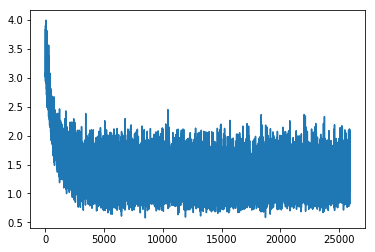

In [449]:
plt.plot(loss_values), len(loss_values)

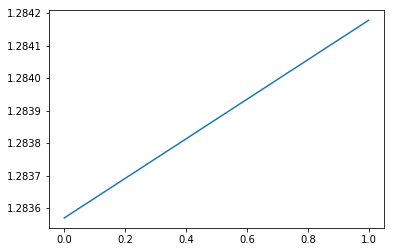

In [385]:
plt.plot(full_loss_df)

In [404]:
a,b,output[0],labels[0], math.sqrt(loss)

(tensor([ 2.9516e-09, -3.6795e-06,  4.3939e-07,  9.4240e-06, -8.6596e-06,
         -3.4940e-08,  5.0013e-06,  5.4550e-08, -7.1702e-04,  1.1346e-06,
          7.6001e-34,  1.4261e-06, -4.8415e-06,  6.9588e-06,  8.7136e-12,
          1.0341e-05,  8.2032e-06,  1.4356e-05, -4.9904e-07, -3.7590e-05,
         -1.2359e-05,  7.8066e-06, -8.4888e-06, -9.1363e-06, -4.4928e-07,
          1.0063e-05,  1.8707e-06,  9.6064e-06, -1.4497e-04,  6.9717e-06,
          5.1353e-06,  6.0970e-05,  4.4981e-18,  6.9048e-09,  7.2303e-06,
         -8.5579e-06, -6.7198e-08,  3.6769e-06, -2.4900e-06,  8.0189e-06],
        grad_fn=<CloneBackward>),
 tensor([ 3.1571e-03, -3.1539e-03, -3.1532e-03,  3.1572e-03, -3.1563e-03,
          3.1560e-03, -1.7320e-03,  3.1543e-03, -3.8260e-03, -3.1511e-03,
         -3.1599e-03,  3.1521e-03, -3.1543e-03,  3.1555e-03,  3.1589e-03,
          3.0880e-03,  3.1563e-03,  3.1606e-03, -3.1540e-03, -3.1797e-03,
          4.6092e-05,  3.1525e-03, -3.1562e-03, -3.1540e-03,  3.1527e-03,
   

In [7]:
# torch.save(model.state_dict(), 'dotprod_scratch_newloader_cyclical')
model = torch.load('dotprod_scratch_newloader_cyclical')

In [12]:
model

OrderedDict([('u_weight.weight',
              tensor([[-8.6841e-36,  3.2889e-30,  1.1903e-06,  ...,  3.2631e-38,
                       -1.1892e-10,  2.4633e-19],
                      [-3.4228e-39, -3.4885e-38, -1.4871e-38,  ..., -3.5964e-38,
                        2.4644e-38, -2.3505e-38],
                      [-2.8143e-10, -6.4258e-08, -2.6095e-04,  ...,  6.6061e-05,
                       -8.2751e-15, -2.0128e-08],
                      ...,
                      [ 7.2796e-03, -1.1564e-02,  7.1503e-03,  ..., -4.8721e-03,
                        5.7802e-03,  1.9108e-03],
                      [ 2.4411e-38, -6.7594e-39,  1.6866e-38,  ...,  2.4968e-38,
                        3.3840e-38, -1.2144e-38],
                      [-2.4958e-04,  2.9398e-03,  1.5412e-29,  ...,  1.6102e-03,
                        1.2250e-04,  5.2640e-04]])),
             ('i_weight.weight',
              tensor([[-3.4810e-37, -2.3941e-30, -1.0620e-12,  ...,  3.7943e-38,
                        6.4215e-16,  

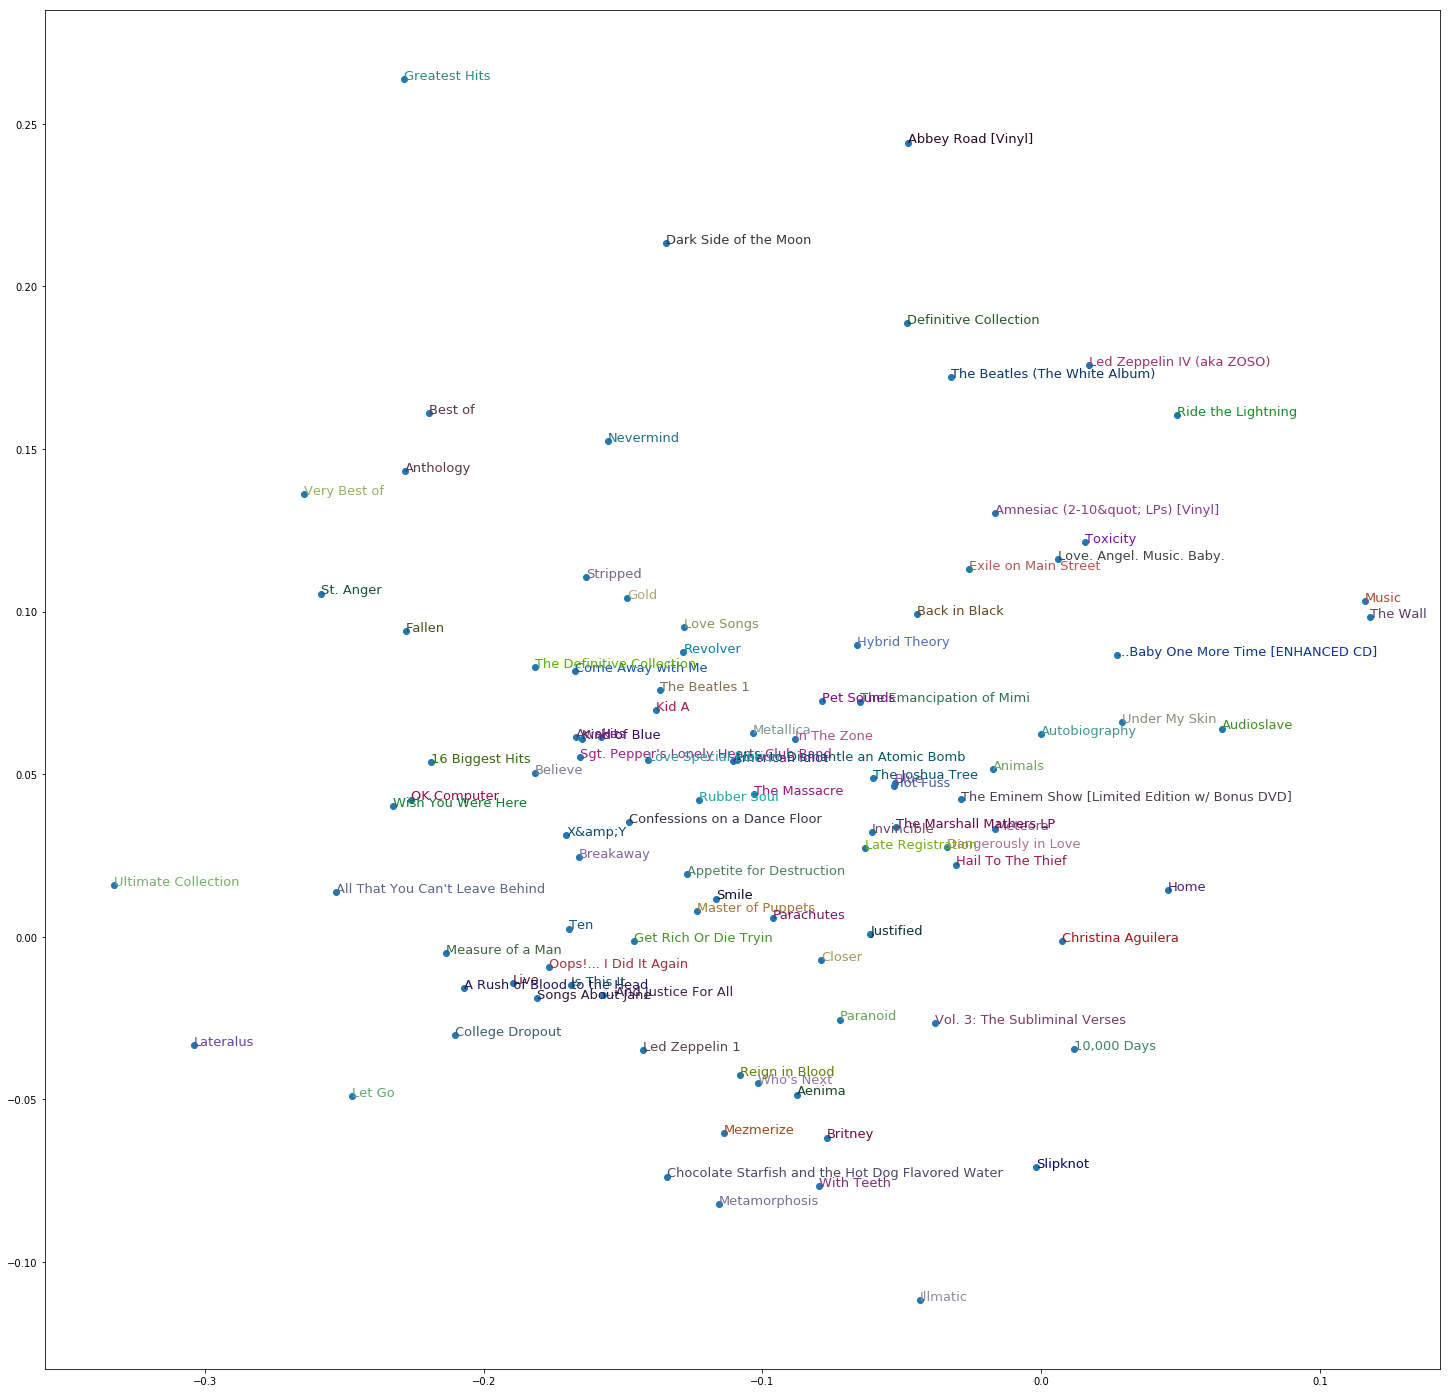

In [16]:
df_music = pd.read_pickle('merged_album_data.pkl')
df_music = df_music[~(df_music['title'].isnull())]
df_music['reviewerID'] = df_music['reviewerID'].apply(lambda x: users_index[x]).astype('int')
df_music['prodID'] = df_music['title'].apply(lambda x: prod_index[x]).astype('int')
g = df_music.groupby('title')['overall'].count()
top_music = g.sort_values(ascending=False).index.values[:1000]
users_w = model['u_weight.weight']
items_w = model['i_weight.weight']
music_index = dict(zip(df_music['title'], df_music['prodID']))

#from fastai - torch pca
def _pca(x, k=2):
    "Compute PCA of `x` with `k` dimensions."
    x = x-torch.mean(x,0)
    U,S,V = torch.svd(x.t())
    return torch.mm(x,U[:,:k])
torch.Tensor.pca = _pca

def generate_embedding_plot(top=500):
    g = df_music.groupby('title')['overall'].count()
    #grab top music
    top_music = g.sort_values(ascending=False).index.values[:top]
    top_music_w = items_w[[music_index[x] for x in top_music.tolist()]]
    #reduce the dimensions from 40 to 2
    top_music_w_pca = top_music_w.detach().pca(2)
    fac0,fac1 = top_music_w_pca.t()
    music_comp = [(f, i) for f,i in zip(fac0, top_music)]
    
    #produce plot
    idxs = np.random.choice(len(top_music), 200, replace=False)
    idxs = list(range(100))
    X = fac0[idxs]
    Y = fac1[idxs]
    plt.figure(figsize=(25,25))
    plt.scatter(X, Y,clip_on=True)
    for i, x, y in zip(top_music[idxs], X, Y):
        plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=13,clip_on=True)
generate_embedding_plot()    

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


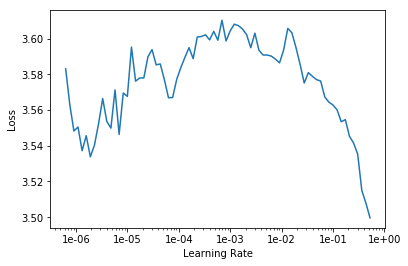

In [411]:
a = np.load('merged_album_data.pkl')
#null album titles are no use for us
a = a[~(a['title'].isnull())]
users_list = a['reviewerID'].unique()
users_index = {user: idx for idx, user in enumerate(users_list)}
#tranform each prod into an index
prod_list = a['title'].unique()
prod_index = {prod: idx for idx, prod in enumerate(prod_list)}
a = a[['reviewerID', 'asin', 'overall', 'title']]
a['reviewerID'] = a['reviewerID'].apply(lambda x: users_index[x]).astype('int')
a['prodID'] = a['title'].apply(lambda x: prod_index[x]).astype('int')
a = a[['reviewerID', 'prodID', 'overall', 'title']]
a = a.drop_duplicates(subset=['reviewerID', 'prodID'])

data = CollabDataBunch.from_df(a[['reviewerID', 'prodID', 'overall', 'title']]
                               , seed=42,bs=64,num_workers=0, item_name='title')

y_range = [0,5.5]
learn = collab_learner(data, n_factors=40, y_range=y_range, wd=1e-2)
learn.lr_find()
learn.recorder.plot(skip_end=15)
learn.fit(epochs=2, lr=1e-2)


In [455]:
learn.weight

<bound method CollabLearner.weight of CollabLearner(data=TabularDataBunch;

Train: LabelList (660003 items)
x: CollabList
reviewerID 0; title Goodbye Worries; ,reviewerID 1; title Goodbye Worries; ,reviewerID 2; title Goodbye Worries; ,reviewerID 3; title Goodbye Worries; ,reviewerID 4; title Goodbye Worries; 
y: FloatList
5.0,4.0,5.0,4.0,5.0
Path: .;

Valid: LabelList (165000 items)
x: CollabList
reviewerID 928; title Armed Forces; ,reviewerID 12619; title Legacy: Absolute Best; ,reviewerID 56663; title Leviathan; ,reviewerID 3543; title Sun Ship; ,reviewerID 568; title Tasty; 
y: FloatList
5.0,5.0,5.0,5.0,4.0
Path: .;

Test: None, model=EmbeddingDotBias(
  (u_weight): Embedding(70398, 40)
  (i_weight): Embedding(42412, 40)
  (u_bias): Embedding(70398, 1)
  (i_bias): Embedding(42412, 1)
), opt_func=functools.partial(<class 'torch.optim.adam.Adam'>, betas=(0.9, 0.99)), loss_func=FlattenedLoss of MSELoss(), metrics=[], true_wd=True, bn_wd=True, wd=0.01, train_bn=True, path=WindowsPath('

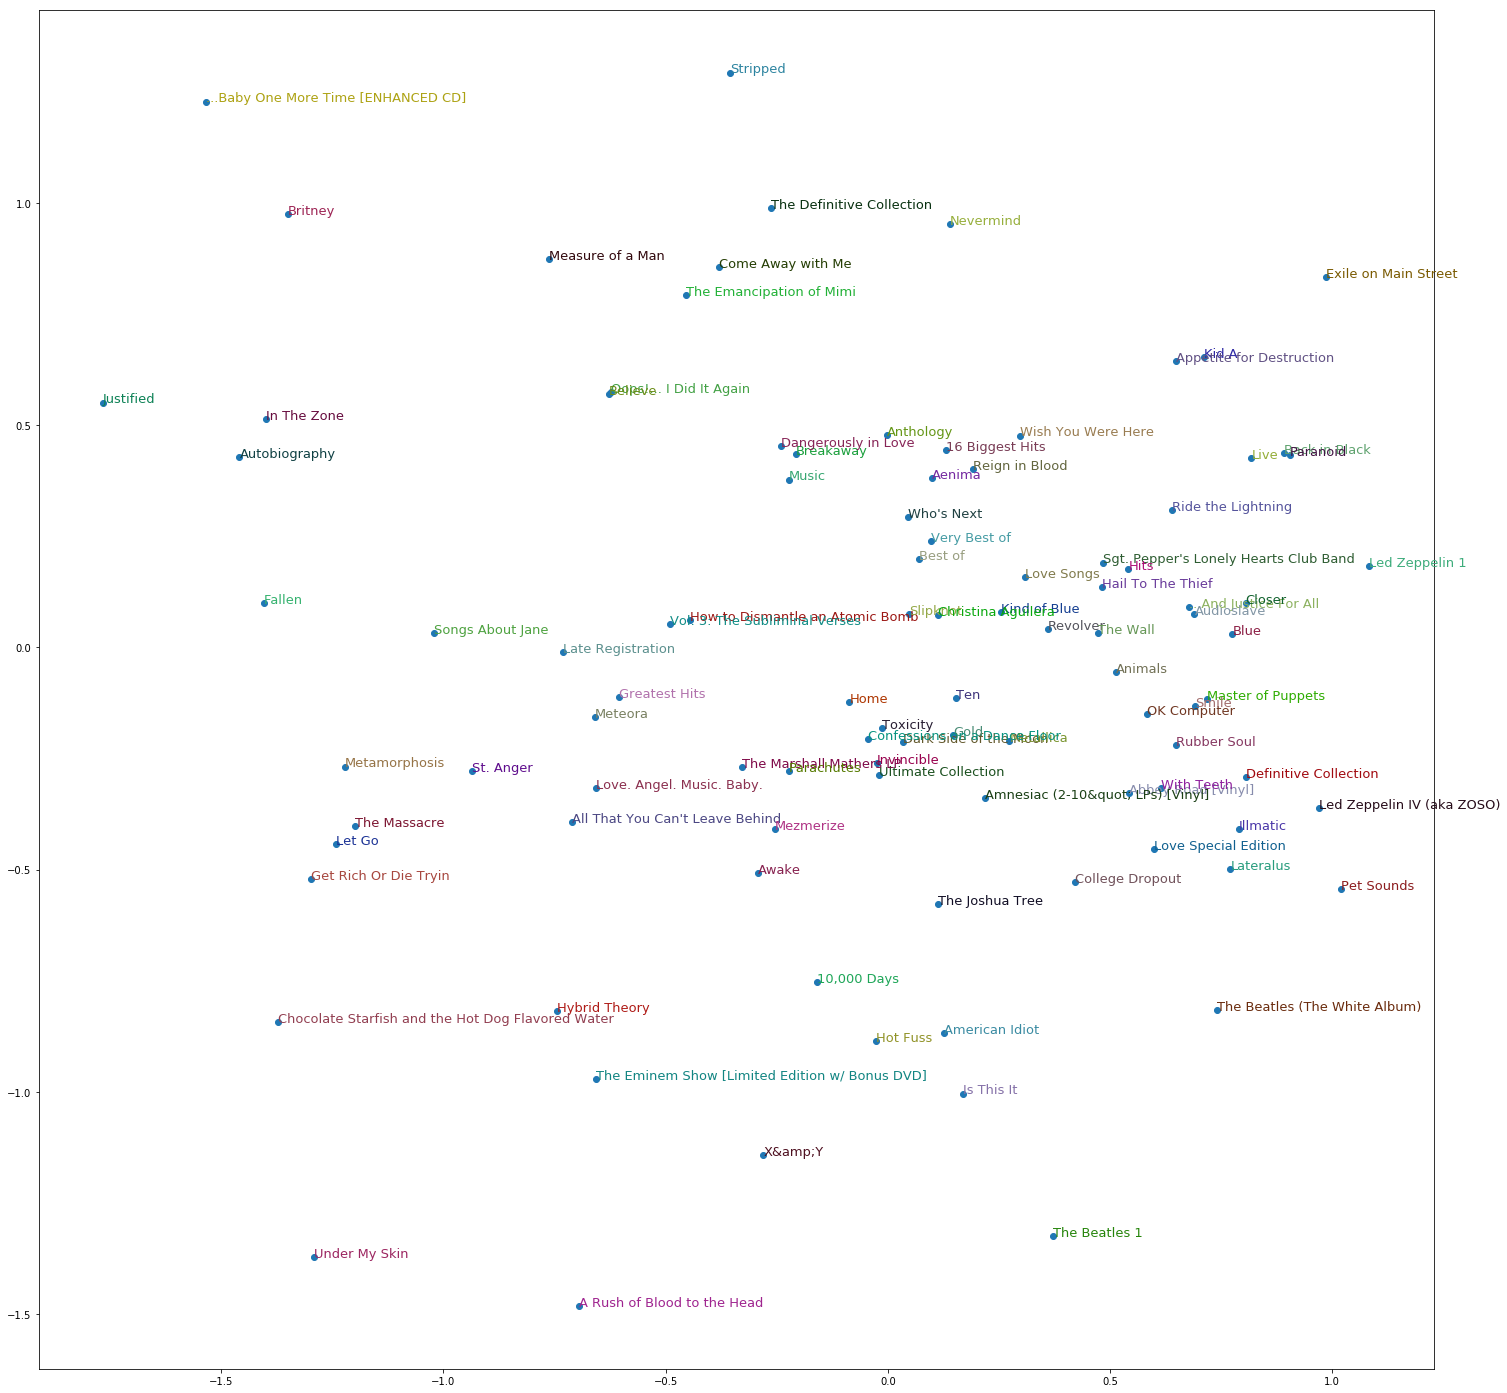

In [454]:
g = df_music.groupby('title')['overall'].count()
#grab top music
top_music = g.sort_values(ascending=False).index.values[:200]
music_w = learn.weight(top_music, is_item=True)
music_pca = music_w.pca(2)
fac0,fac1 = music_pca.t()
music_comp = [(f, i) for f,i in zip(fac0, top_music)]

#produce plot
idxs = np.random.choice(len(top_music), 200, replace=False)
idxs = list(range(100))
X = fac0[idxs]
Y = fac1[idxs]
plt.figure(figsize=(25,25))
plt.scatter(X, Y)
for i, x, y in zip(top_music[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=13)
plt.show()

# Album similarity finder
- using cosine similarity: https://pytorch.org/docs/master/nn.html?highlight=cosine#torch.nn.CosineSimilarity and euclidean distance

In [204]:
df_music = pd.read_pickle('merged_album_data.pkl')
df_music = df_music[~(df_music['title'].isnull())]
df_music['reviewerID'] = df_music['reviewerID'].apply(lambda x: users_index[x]).astype('int')
df_music['prodID'] = df_music['title'].apply(lambda x: prod_index[x]).astype('int')
g = df_music.groupby('title')['overall'].count()
top_music = g.sort_values(ascending=False).index.values[:1000]
users_w = model['u_weight.weight']
items_w = model['i_weight.weight']
music_index = dict(zip(df_music['title'], df_music['prodID']))

In [205]:
from torch.nn import CosineSimilarity
cos = CosineSimilarity(dim=1, eps=1e-6)
cos(items_w, items_w)

tensor([0.2256, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 0.0271])

In [45]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = pd.DataFrame(cosine_similarity(
            X=items_w),
            index=list(music_index.keys()))
similarity_matrix.columns = list(music_index.keys())
similarity_matrix.head()

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\extmath.py:91: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(norms, norms)


Goodbye Worries  \
Goodbye Worries                                        1.000000e+00   
Coleman Hawkins Encounters Ben Webster                -2.929113e-01   
Delta Sleep System: Fall Asleep / Stay Asleep /...    -5.235560e-08   
Legends of Radio: Shadow                              -3.078026e-01   
Dreamland: World Lullabies &amp; Soothing Songs        2.121147e-38   

                                                    Coleman Hawkins Encounters Ben Webster  \
Goodbye Worries                                                              -2.929113e-01   
Coleman Hawkins Encounters Ben Webster                                        9.999999e-01   
Delta Sleep System: Fall Asleep / Stay Asleep /...                            4.212495e-01   
Legends of Radio: Shadow                                                      8.454048e-01   
Dreamland: World Lullabies &amp; Soothing Songs                              -6.063547e-38   

                                                    Delta Sleep System: Fall Asleep / Stay Asleep / Wake Up Rejuvenated  \
Goodbye Worries                                                                         -5.235560e-08                     
Coleman Hawkins Encounters Ben Webster                                                   4.212495e-01                     
Delta Sleep System: Fall Asleep / Stay Asleep /...                                       1.000000e+00                     
Legends of Radio: Shadow                                                                 4.554598e-01                     
Dreamland: World Lullabies &amp; Soothing Songs                                         -2.494235e-38                     

                                                    Legends of Radio: Shadow  \
Goodbye Worries                                                -3.078026e-01   
Coleman Hawkins Encounters Ben Webster                          8.454048e-01   
Delta Sleep System: Fall Asleep / Stay Asleep /...              4.554598e-01   
Legends of Radio: Shadow                                        9.999999e-01   
Dreamland: World Lullabies &amp; Soothing Songs                -4.938576e-38   

                                                    Dreamland: World Lullabies &amp; Soothing Songs  \
Goodbye Worries                                                                        2.121147e-38   
Coleman Hawkins Encounters Ben Webster                                                -6.063547e-38   
Delta Sleep System: Fall Asleep / Stay Asleep /...                                    -2.494235e-38   
Legends of Radio: Shadow                                                              -4.938576e-38   
Dreamland: World Lullabies &amp; Soothing Songs                                        0.000000e+00   

                                                    Tibetan Meditation Music  \
Goodbye Worries                                                 5.631604e-08   
Coleman Hawkins Encounters Ben Webster                         -4.202084e-01   
Delta Sleep System: Fall Asleep / Stay Asleep /...             -9.977376e-01   
Legends of Radio: Shadow                                       -4.609189e-01   
Dreamland: World Lullabies &amp; Soothing Songs                 2.568022e-38   

                                                    Hudson River Wind Meditations  \
Goodbye Worries                                                     -1.677742e-01   
Coleman Hawkins Encounters Ben Webster                               7.617144e-01   
Delta Sleep System: Fall Asleep / Stay Asleep /...                   1.586892e-01   
Legends of Radio: Shadow                                             6.349782e-01   
Dreamland: World Lullabies &amp; Soothing Songs                     -6.825526e-38   

                                                    Handel: Messiah - The Complete Work  \
Goodbye Worries                                                            3.653305e-01   
Coleman Hawkins Encounters Ben Webster         

In [63]:
def find_similar_albums(album, n):
    similar_items = pd.DataFrame(similarity_matrix.loc[album])
    similar_items.columns = ['score']
    similar_items = similar_items.sort_values('score', ascending=False)
    similar_items = similar_items.head(n).reset_index()
    similar_items = similar_items.rename(index=str, columns={'index': 'item_id'})
    return similar_items.to_dict()

In [70]:
find_similar_albums('Kid A', 10)
ex = similarity_matrix.loc['Kid A'].reset_index()
ex[ex['index']=='Britney']

index     Kid A
28401  Britney  0.932628

In [92]:
metadata['productType'] = metadata['salesRank'].apply(lambda x: [str(i) for i in x][0] if len(str(x))>4 else '')
metadata[metadata['productType']=='Music']['categories'].head()

1                           [[CDs & Vinyl, Christian]]
3    [[CDs & Vinyl, Children's Music], [CDs & Vinyl...
4         [[CDs & Vinyl, Christian, Praise & Worship]]
6    [[CDs & Vinyl, Children's Music], [CDs & Vinyl...
8    [[CDs & Vinyl, World Music, Middle East, Israel]]
Name: categories, dtype: object

In [93]:
metadata['genre'] = metadata['categories'].apply(lambda x: str(x).replace(']', '').split(', ')[1].replace("'", '')
                                                                                   if len(str(x).replace(']', '').split(', '))>1 
                                                                                    else '')

In [94]:
metadata[metadata['productType']=='Music'].groupby('genre')['asin'].count().sort_values(ascending=False).head()

genre
Classical             74083
Pop                   70632
Alternative Rock      65052
Jazz                  41991
Dance & Electronic    35290
Name: asin, dtype: int64

In [95]:
df_music['overall'].describe()

count    828705.000000
mean          4.298123
std           1.073137
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: overall, dtype: float64

# The rating alone doesn't mean anything if it's nearly always a 5
- This might be okay because we don't really care about the prediction of rating.
- We should try to include the genre of the music from the metadata file and include in the model to see if our feature space looks better


In [90]:
#load data
a = np.load('merged_album_data.pkl')
#null album titles are no use for us
a = a[~(a['title'].isnull())]
users_list = a['reviewerID'].unique()
users_index = {user: idx for idx, user in enumerate(users_list)}
#tranform each prod into an index
prod_list = a['title'].unique()
prod_index = {prod: idx for idx, prod in enumerate(prod_list)}
a = a[['reviewerID', 'asin', 'overall', 'title']]
a['reviewerID'] = a['reviewerID'].apply(lambda x: users_index[x]).astype('int')
a['prodID'] = a['title'].apply(lambda x: prod_index[x]).astype('int')
a = a[['reviewerID', 'prodID', 'overall', 'title']]
a = a.drop_duplicates(subset=['reviewerID', 'prodID'])

# We have different genres for the same album. We need to pick on (the dominant one)

In [349]:
a = a.merge(metadata[['title', 'genre']], on='title', how='inner')

In [350]:
#create a genre index
genre_list = a['genre'].unique()
genre_index = {genre: idx for idx, genre in enumerate(genre_list)}
a['genreID'] = a['genre'].apply(lambda x: genre_index[x]).astype('int')
a.to_pickle('merged_album_data_model_genre.pkl')

In [86]:
a.head()

reviewerID  prodID  overall            title                 genre  genreID
0           0       0      5.0  Goodbye Worries  Comedy & Spoken Word        0
1           1       0      4.0  Goodbye Worries  Comedy & Spoken Word        0
2           2       0      5.0  Goodbye Worries  Comedy & Spoken Word        0
3           3       0      4.0  Goodbye Worries  Comedy & Spoken Word        0
4           4       0      5.0  Goodbye Worries  Comedy & Spoken Word        0

In [87]:
a[a['prodID']==276].head()

reviewerID  prodID  overall    title         genre  genreID
287514        3823     276      4.0  Best of     Classical       16
287515        3823     276      4.0  Best of         Blues        7
287516        3823     276      4.0  Best of          Rock        6
287517        3823     276      4.0  Best of  Classic Rock        9
287518        3823     276      4.0  Best of         Blues        7

In [190]:
np.array(a.iloc[:,2:3])
# np.array(a.iloc[:,0:1])

array([[5.],
       [4.],
       [5.],
       ...,
       [4.],
       [5.],
       [5.]])

In [160]:
#alter model
from torch.nn import Module, Embedding, MSELoss
from torch.optim import *
from torch.autograd import Variable
import torch 

class EmbeddingModelGenre(Module):
    #initiate the weights and biases of user and product.
    #these need to be leared through forward pass
    def __init__(self, n_dims, n_users, n_items, n_genres, y_range):
        super(EmbeddingModelGenre, self).__init__()
        self.y_range=y_range #the review range (0-5+)
        (self.u_weight, self.i_weight, self.g_weight, self.u_bias, self.i_bias, self.g_bias) = [Embedding(*o) for o in [
            (n_users, n_dims), #user weights
            (n_items, n_dims), #product weights
            (n_genres, n_dims), #genre weights
            (n_users,1), #user bias
            (n_items,1),
            (n_genres,1)]] #product bias
        #initialise the weights to between 0 and std of 0.05
        self.u_weight.weight.data.uniform_(0,0.05)
        self.i_weight.weight.data.uniform_(0,0.05)
        self.g_weight.weight.data.uniform_(0,0.05)
        self.u_bias.weight.data.uniform_(0,0.05)
        self.i_bias.weight.data.uniform_(0,0.05)
        self.g_bias.weight.data.uniform_(0,0.05)
    def forward(self, users, items, genres):
        matmul = self.u_weight(users)* self.i_weight(items)* self.g_weight(genres)
        out = matmul.sum(1) + self.u_bias(users).squeeze() + self.i_bias(items).squeeze() + self.g_bias(genres).squeeze()
        #run output through a sigmoid
        return torch.sigmoid(out) * (self.y_range[1]-self.y_range[0]) + self.y_range[0]
    


In [191]:
from torch.utils.data import Dataset, DataLoader
#create a custom data dataset / dataloader
class music_dataset(Dataset):

    def __init__(self):
        xy = np.load('merged_album_data_model_genre.pkl')
        self.u = np.array(xy.iloc[:,0:1])
        self.p = np.array(xy.iloc[:,1:2])
        self.g = np.array(xy.iloc[:,5:6])
        self.up = np.array(xy.iloc[:,0:2])
        self.upg = np.array(xy.iloc[:, [0,1,5]])
        self.y = np.array(xy.iloc[:,2:3])
    def __len__(self):
        return len(self.upg)

    def __getitem__(self, idx):
        return self.upg[idx], self.y[idx]
df_new = music_dataset()
ds = DataLoader(df_new, batch_size=1, shuffle=True)

In [216]:
#we have a simple architecture now (embeddings). 
#we need to build a learner to train the model with
# Loop over epochs
#https://github.com/devforfu/pytorch_playground/blob/master/movielens.ipynb
import math
import torch.nn.functional as F
df_new = music_dataset()
ds = DataLoader(df_new, batch_size=64, shuffle=True)

model = EmbeddingModelGenre(n_dims=40, n_users=len(np.unique(df_new.u)),
            n_items=len(np.unique(df_new.p)), n_genres=len(genre_index) ,y_range=[0,5.5])

max_epochs = 1
lr=1e-2
optimizer = Adam(model.parameters(),lr=lr,weight_decay=1e-5)
iterations_per_epoch = len(ds)
scheduler = CyclicLR(optimizer, cosine(t_max=iterations_per_epoch * 2, eta_min=lr/10))
optimizer.zero_grad()
full_loss_df = []
loss_values = []
iteration = 0
for epoch in range(max_epochs):
    # Training
    loss= 0.
    for local_index, local_batch in enumerate(ds, 0):
        iteration += 1
        loss= 0.
        #pass in the indices of the batch user and prod 
        output = model.forward(local_batch[0][:,0:1].squeeze(1).long(),
                               local_batch[0][:,1:2].squeeze(1).long(),
                               local_batch[0][:,2:3].squeeze(1).long())
        #compare outputs of batch with n=64 to label and compute the loss
        labels = local_batch[1].float()
        #calculate the loss
        loss = F.mse_loss(output, labels)
        scheduler.step()
        #update the parameters using backpropogation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_values.append(loss.data.item())
        if iteration % 100 == 0:
            print(loss.data.item())
    #load full dataset and run forward pass
    output_full = Variable(model.forward(torch.tensor(df_new.up[:,0:1].squeeze(1)).long(),
                                 torch.tensor(df_new.up[:,1:2].squeeze(1)).long(),
                                 torch.tensor(df_new.up[:,2:3].squeeze(1)).long()), requires_grad=False)
    full_loss = F.mse_loss(output_full, Variable(torch.tensor(df_new.y).float().squeeze(1)))        #calculate the loss
    full_loss_df.append(full_loss.data.item())    

1.1868700981140137
0.6889727711677551
1.412352442741394
1.075107455253601
0.9108652472496033
1.078332781791687
0.9648211002349854
0.6436488032341003
1.0429396629333496
1.0209295749664307
1.0251641273498535
1.3203859329223633
1.5078984498977661
1.1464312076568604
1.1558308601379395
0.8929541707038879
0.7040067911148071
0.8899564146995544
1.5813910961151123
0.876278281211853
0.7852395176887512
1.2744996547698975
0.9107570052146912
0.522183895111084
0.7380713820457458
0.7601425051689148
0.9058966636657715
0.678735077381134
1.120218276977539
0.898417055606842
0.6057674884796143
1.2434862852096558
0.6746989488601685
1.0714218616485596
1.108599066734314
1.0853370428085327
0.9643938541412354
1.4646995067596436
1.172879934310913
1.6226238012313843
0.7586389780044556
1.4169729948043823
0.8198652267456055
0.7980973124504089
1.41299307346344
0.9860259890556335
1.5250502824783325
0.7485185861587524
1.033703327178955
1.197386622428894
1.1766775846481323
1.2476754188537598
0.6805028319358826
1.09712

KeyboardInterrupt: 

In [222]:
output_full = Variable(model.forward(torch.tensor(df_new.upg[:,0:1].squeeze(1)).long(),
                             torch.tensor(df_new.upg[:,1:2].squeeze(1)).long(),
                             torch.tensor(df_new.upg[:,2:].squeeze(1)).long()), requires_grad=False)
full_loss = F.mse_loss(output_full, Variable(torch.tensor(df_new.y).float().squeeze(1)))  

In [223]:
full_loss

tensor(1.0282)

In [226]:
# torch.save(model.state_dict(), 'dotprod_scratch_genre')
model2 = torch.load('dotprod_scratch_genre')

In [234]:
genres_w

tensor([[ 4.8672e-39, -1.2458e-39, -5.4228e-39,  ..., -1.8018e-39,
         -5.1717e-39,  2.3691e-39],
        [ 1.5630e-39, -2.4590e-39, -1.5364e-39,  ..., -8.4679e-40,
         -1.7890e-39, -2.9540e-39],
        [ 4.1995e-40, -3.5492e-40,  1.3879e-39,  ...,  3.3255e-40,
          5.9573e-39,  5.8625e-39],
        ...,
        [ 3.2256e-38, -9.9711e-38, -3.4194e-40,  ..., -1.2524e-37,
         -1.2765e-37, -1.2087e-37],
        [-4.8475e-38,  4.6640e-38, -1.1930e-37,  ...,  6.8179e-39,
         -1.6007e-37, -3.9036e-38],
        [-4.6255e-38,  6.7054e-38, -1.2631e-37,  ...,  4.7746e-38,
         -6.2693e-38, -6.8354e-39]])

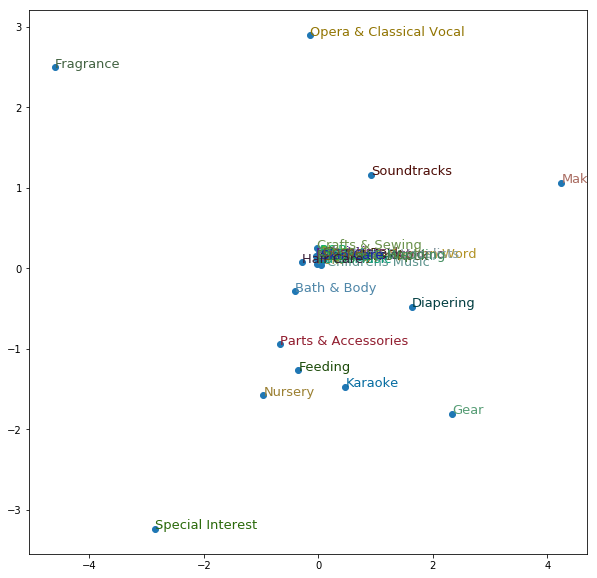

In [251]:
users_w = model2['u_weight.weight']
genres_w = model2['g_weight.weight']
g = df_music.groupby('title')['overall'].count()
#grab top music
top_genres_w = genres_w[[genre_index[x] for x in genre_list]]
#reduce the dimensions from 40 to 2
top_genres_w_pca = top_genres_w.detach().pca(2)*10e36
fac0,fac1 = top_genres_w_pca.t()

#produce plot
X = fac0
Y = fac1
plt.figure(figsize=(10,10))
plt.scatter(X, Y,clip_on=True)
for i, x, y in zip(genre_list, X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=13,clip_on=True) 

# Genre weights aren't saying anything interesting
- Switch to a binary problem (buy or not buy), taking samples of albums that the each user didn't review. We assume that everyone that bought an album reviewed it, just for the purposes of this exercise.
- try this approach: https://www.youtube.com/watch?v=ZkBQ6YA9E40 10min  (sampled loss function). 11.08 for code

In [5]:
#load up data
a = np.load('merged_album_data.pkl')
#null album titles are no use for us
a = a[~(a['title'].isnull())]
users_list = a['reviewerID'].unique()
users_index = {user: idx for idx, user in enumerate(users_list)}
#tranform each prod into an index
prod_list = a['title'].unique()
prod_index = {prod: idx for idx, prod in enumerate(prod_list)}
a = a[['reviewerID', 'asin', 'overall', 'title']]
a['reviewerID'] = a['reviewerID'].apply(lambda x: users_index[x]).astype('int')
a['prodID'] = a['title'].apply(lambda x: prod_index[x]).astype('int')
a = a[['reviewerID', 'prodID', 'overall', 'title']]
a = a.drop_duplicates(subset=['reviewerID', 'prodID'])
a['purchase_flag'] = 1

In [5]:
#create new column 'buy'
a.head()

reviewerID  prodID  overall            title  purchase_flag
0           0       0      5.0  Goodbye Worries              1
1           1       0      4.0  Goodbye Worries              1
2           2       0      5.0  Goodbye Worries              1
3           3       0      4.0  Goodbye Worries              1
4           4       0      5.0  Goodbye Worries              1

In [245]:
#function used from https://medium.com/@2j/negative-sampling-in-numpy-18a9ad810385
def negsamp_vectorized_bsearch(pos_inds, n_items, n_samp=32):
    raw_samps = np.random.randint(0, n_items, size=n_samp)
    ss = np.searchsorted(pos_inds, raw_samps)
    pos_mask = raw_samps == np.take(pos_inds, ss, mode='clip')
    neg_inds = raw_samps[~pos_mask]
    return neg_inds

In [251]:
#shrink dataframe so that we have one row per reviewer, with products as an array
#n_samp is another hyperparameter that would be good to optimise. Perhaps we could just look at popular products?
a_shrink = a.groupby('reviewerID')['prodID'].apply(np.array).rename('prodIDs').reset_index()
a_shrink['negative_prodIDs'] = a_shrink['prodIDs'].apply(lambda x: negsamp_vectorized_bsearch(x, max(prod_index.values()), n_samp=2*len(x)))

In [252]:
a_shrink.head(10)

reviewerID                                            prodIDs  \
0           0                            [0, 4421, 23362, 25772]   
1           1                                  [0, 22451, 11908]   
2           2  [0, 6010, 6541, 7587, 8309, 320, 20177, 25566,...   
3           3                                         [0, 41662]   
4           4                        [0, 103, 980, 10920, 26572]   
5           5                            [0, 5590, 12731, 31786]   
6           6                                   [0, 5836, 11194]   
7           7                                                [0]   
8           8  [0, 4435, 8493, 13130, 24133, 33375, 38878, 42...   
9           9  [1, 1493, 6716, 13247, 14112, 14173, 14248, 14...   

                                    negative_prodIDs  
0  [16432, 29324, 25347, 24780, 30989, 38151, 862...  
1           [36582, 24062, 5257, 30443, 7508, 33073]  
2  [27515, 5775, 15438, 27363, 7252, 19857, 26918...  
3                        [21195, 6356, 29141, 21750]  
4  [2313, 12607, 14184, 15788, 40201, 620, 21250,...  
5  [20743, 15408, 8632, 26343, 36938, 42376, 2483...  
6            [3924, 36367, 37772, 5595, 35329, 3848]  
7                                     [19203, 41768]  
8  [38547, 31691, 36932, 21408, 10389, 21448, 274...  
9  [9521, 32821, 22930, 1715, 5550, 786, 35494, 2...

In [253]:
s = a_shrink.apply(lambda x: pd.Series(x['negative_prodIDs']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'prodID'
a_shrink = a_shrink.drop(['prodIDs','negative_prodIDs'], axis=1).join(s)
a_shrink['purchase_flag'] = 0
a_w_negs = pd.concat([a[['reviewerID', 'prodID', 'purchase_flag']], a_shrink], ignore_index=True)
a_w_negs.head()

reviewerID  prodID  purchase_flag
0           0     0.0              1
1           1     0.0              1
2           2     0.0              1
3           3     0.0              1
4           4     0.0              1

In [254]:
a_w_negs = a_w_negs.sort_values(['reviewerID', 'prodID'], ascending=[True, True]).reset_index()[['reviewerID', 'prodID', 'purchase_flag']]

In [261]:
a_w_negs.to_pickle('merged_album_data_negs.pkl')
a_w_negs.head()

reviewerID   prodID  purchase_flag
0           0      0.0              1
1           0   4421.0              1
2           0   8626.0              0
3           0  16432.0              0
4           0  23362.0              1

In [262]:
np.array(a_w_negs.iloc[:,0:1])

array([[    0],
       [    0],
       [    0],
       ...,
       [71492],
       [71492],
       [71492]], dtype=int64)

# Set up model and dataloader as before
- Loss function is now binary, not MSELoss as we are don't care about the review rating.

In [263]:
from torch.utils.data import Dataset, DataLoader
#create a custom data dataset / dataloader
class music_dataset(Dataset):

    def __init__(self):
        xy = np.load('merged_album_data_negs.pkl')
        self.u = np.array(xy.iloc[:,0:1])
        self.p = np.array(xy.iloc[:,1:2])
        self.up = np.array(xy.iloc[:,0:2])
        self.y = np.array(xy.iloc[:,2:])
    def __len__(self):
        return len(self.up)

    def __getitem__(self, idx):
        return self.up[idx], self.y[idx]

In [264]:
#we need weights for the: Users, products (music), bias for Users, and bias for products (music).
#so 4 parameters.
from torch.nn import Module, Embedding, BCELoss
from torch.optim import *
from torch.autograd import Variable
import torch 

def get_embs(ni, nf):
    "Create an embedding layer."
    emb = torch.nn.Embedding(ni, nf)
    # See https://arxiv.org/abs/1711.09160
    emb.weight.data.uniform_(0,0.05)
    return emb

class EmbeddingModel(Module):
    #initiate the weights and biases of user and product.
    #these need to be leared through forward pass
    def __init__(self, n_dims, n_users, n_items, y_range):
        super(EmbeddingModel, self).__init__()
        self.y_range=y_range 
        (self.u_weight, self.i_weight, self.u_bias, self.i_bias) = [get_embs(*o) for o in [
            (n_users, n_dims), #user weights
            (n_items, n_dims), #product weights
            (n_users,1), #user bias
            (n_items,1)]] #product bias
    def forward(self, users, items):
        matmul = self.u_weight(users)* self.i_weight(items)
        out = matmul.sum(1) + self.u_bias(users).squeeze() + self.i_bias(items).squeeze()
        #run output through a sigmoid
        return torch.sigmoid(out)
model = EmbeddingModel(n_dims=40, n_users=len(np.unique(df_new.u)),
           n_items=len(np.unique(df_new.p)), y_range=[0,1])

In [265]:
model

EmbeddingModel(
  (u_weight): Embedding(71493, 40)
  (i_weight): Embedding(42417, 40)
  (u_bias): Embedding(71493, 1)
  (i_bias): Embedding(42417, 1)
)

In [266]:
#we have a simple architecture now (embeddings). 
#we need to build a learner to train the model with
# Loop over epochs
#https://github.com/devforfu/pytorch_playground/blob/master/movielens.ipynb
import math
import torch.nn.functional as F
df_new = music_dataset()
ds = DataLoader(df_new, batch_size=64, shuffle=True)

model = EmbeddingModel(n_dims=40, n_users=len(np.unique(df_new.u)),
           n_items=len(np.unique(df_new.p)))
lr=5e-3
loss_func = BCELoss()
max_epochs = 2
optimizer = Adam(model.parameters(),lr=lr,weight_decay=1e-5)
iterations_per_epoch = len(ds)
scheduler = CyclicLR(optimizer, cosine(t_max=iterations_per_epoch * 2, eta_min=lr/10))
optimizer.zero_grad()
full_loss_df = []
loss_values = []
for epoch in range(max_epochs):
    # Training
    loss= 0.
    for local_index, local_batch in enumerate(ds, 0):
        loss= 0.
        #pass in the indices of the batch user and prod 
        output = model.forward(local_batch[0][:,0:1].squeeze(1).long(), local_batch[0][:,1:2].squeeze(1).long())
        #compare outputs of batch with n=64 to label and compute the loss
        labels = local_batch[1].float()
        #calculate the loss
        a = model.u_weight(local_batch[0][:,0:1].squeeze(1).long()[0]).clone()
        loss = loss_func(output, labels.squeeze(1))
        scheduler.step()
        #update the parameters using backpropogation
        loss.backward()
        optimizer.step()
        b = model.u_weight(local_batch[0][:,0:1].squeeze(1).long()[0]).clone()
        #check if it's trained. if it hasn't then stop the training
        assert torch.equal(a.data, b.data)==False
        optimizer.zero_grad()
        loss_values.append(loss.data.item())
        if (len(loss_values) % 100 == 0) | (len(loss_values) == 1):
            print(loss.data.item())

    #load full dataset and run forward pass
    output_full = Variable(model.forward(torch.tensor(df_new.up[:,0:1].squeeze(1)).long(),
                                 torch.tensor(df_new.up[:,1:2].squeeze(1)).long()), requires_grad=False)
    full_loss = loss_func(output_full, Variable(torch.tensor(df_new.y).float().squeeze(1)))        #calculate the loss
    full_loss_df.append(full_loss.data.item())    

0.7036705017089844
0.6922671794891357
0.6831150054931641
0.6763442158699036
0.6853271126747131
0.6867820620536804
0.6869874596595764
0.6773322820663452
0.6796297430992126
0.651926577091217
0.6805076599121094
0.666042149066925
0.6466982960700989
0.6991538405418396
0.6511741280555725
0.6666024327278137
0.654398500919342
0.6345608830451965
0.5978545546531677
0.6313440203666687
0.6566004157066345
0.6370165348052979
0.6533534526824951
0.6318318843841553
0.6544917225837708
0.6540419459342957
0.6368603110313416
0.6173343658447266
0.6159279942512512
0.6201200485229492
0.6517404913902283
0.619516909122467
0.6450998783111572
0.6150875091552734
0.5996489524841309
0.597984254360199
0.6535895466804504
0.6594848036766052
0.6072611212730408
0.6290441155433655
0.6349982023239136
0.6579679250717163
0.6060444712638855
0.6220936179161072
0.6313040852546692
0.5995038747787476
0.6234817504882812
0.5979055762290955
0.6014708280563354
0.5927386283874512
0.5925168991088867
0.6236304044723511
0.613108932971954

0.5461698174476624
0.5766378045082092
0.5939958691596985
0.6393498182296753
0.5314661860466003
0.6021086573600769
0.5700802206993103
0.6073172688484192
0.5715272426605225
0.5588343143463135
0.5842827558517456
0.532828688621521
0.5576651096343994
0.5675908923149109
0.5756314396858215
0.5647062063217163
0.5511207580566406
0.6215497851371765
0.5709980130195618
0.6310092210769653
0.6041561961174011
0.6326237320899963
0.6221601963043213
0.5720024704933167
0.6242944002151489
0.6109933853149414
0.631979763507843
0.6033949255943298
0.5546462535858154
0.5781230330467224
0.6238270998001099
0.5916696786880493
0.5961244702339172
0.5575577020645142
0.5908481478691101
0.5603151321411133
0.6282773017883301
0.5817863345146179
0.6008946299552917
0.656209409236908
0.6779339909553528
0.5807806253433228
0.5894190669059753
0.5669399499893188
0.6172085404396057
0.6010196208953857
0.5525634288787842
0.5977869629859924
0.599763810634613
0.5373119115829468
0.5562747120857239
0.6316370368003845
0.57988601922988

([<matplotlib.lines.Line2D at 0x18b7b24a278>], 77250)

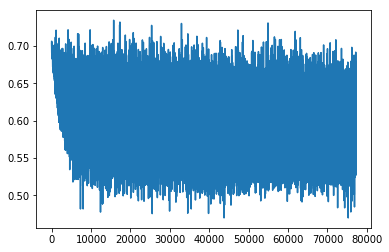

In [267]:
plt.plot(loss_values), len(loss_values)

In [268]:
full_loss_df

[0.5863319635391235, 0.5853163599967957]

In [293]:
# torch.save(model.state_dict(), 'dotprod_scratch_binary_2timesneg')
model = torch.load('dotprod_scratch_binary')

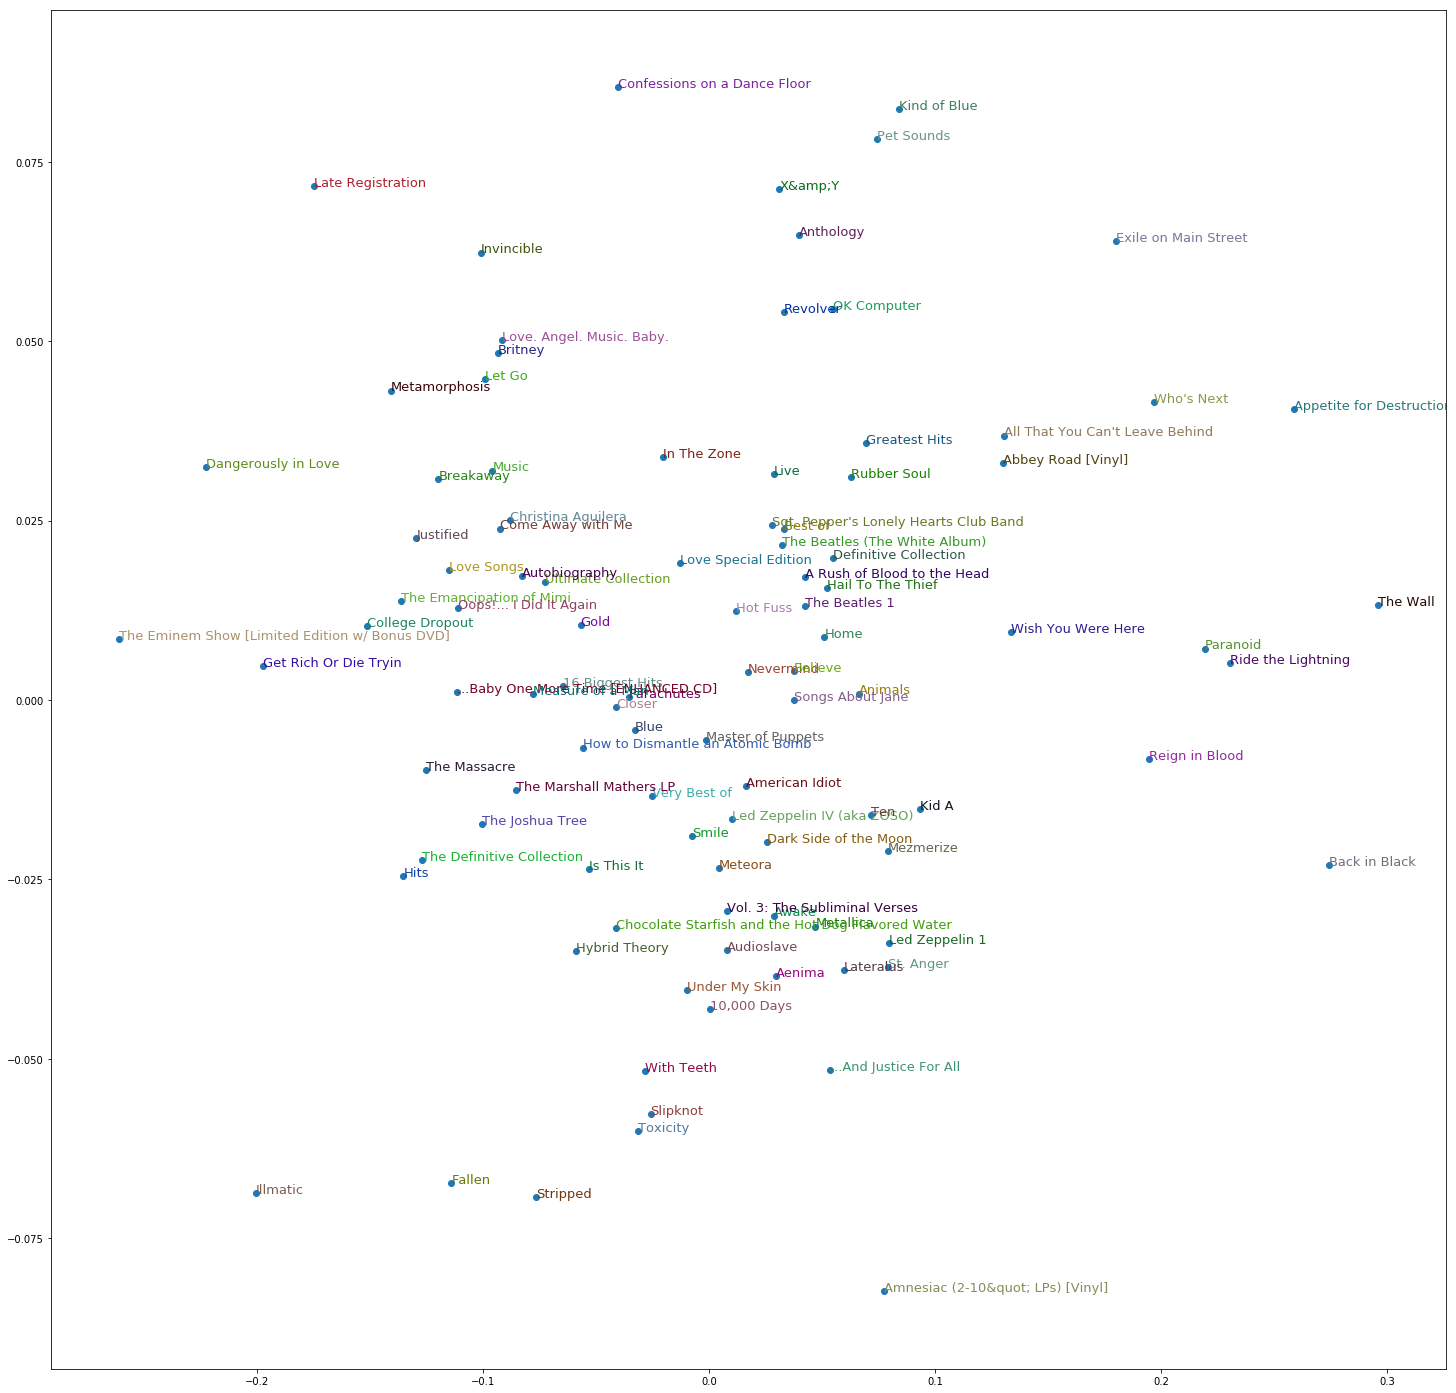

In [294]:
df_music = pd.read_pickle('merged_album_data.pkl')
df_music = df_music[~(df_music['title'].isnull())]
df_music['reviewerID'] = df_music['reviewerID'].apply(lambda x: users_index[x]).astype('int')
df_music['prodID'] = df_music['title'].apply(lambda x: prod_index[x]).astype('int')
g = df_music.groupby('title')['overall'].count()
top_music = g.sort_values(ascending=False).index.values[:1000]
users_w = model['u_weight.weight']
items_w = model['i_weight.weight']
music_index = dict(zip(df_music['title'], df_music['prodID']))

#from fastai - torch pca
def _pca(x, k=2):
    "Compute PCA of `x` with `k` dimensions."
    x = x-torch.mean(x,0)
    U,S,V = torch.svd(x.t())
    return torch.mm(x,U[:,:k])
torch.Tensor.pca = _pca

def generate_embedding_plot(top=500):
    g = df_music.groupby('title')['overall'].count()
    #grab top music
    top_music = g.sort_values(ascending=False).index.values[:top]
    top_music_w = items_w[[music_index[x] for x in top_music.tolist()]]
    #reduce the dimensions from 40 to 2
    top_music_w_pca = top_music_w.detach().pca(2)
    fac0,fac1 = top_music_w_pca.t()
    music_comp = [(f, i) for f,i in zip(fac0, top_music)]
    
    #produce plot
    idxs = np.random.choice(len(top_music), 300, replace=False)
    idxs = list(range(100))
    X = fac0[idxs]
    Y = fac1[idxs]
    plt.figure(figsize=(25,25))
    plt.scatter(X, Y,clip_on=True)
    for i, x, y in zip(top_music[idxs], X, Y):
        plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=13,clip_on=True)
generate_embedding_plot()    

In [296]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = pd.DataFrame(cosine_similarity(
            X=items_w),
            index=list(music_index.keys()))
similarity_matrix.columns = list(music_index.keys())

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\extmath.py:91: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(norms, norms)


In [297]:
def find_similar_albums(album, n):
    similar_items = pd.DataFrame(similarity_matrix.loc[album])
    similar_items.columns = ['score']
    similar_items = similar_items.sort_values('score', ascending=False)
    similar_items = similar_items.head(n).reset_index()
    similar_items = similar_items.rename(index=str, columns={'index': 'item_id'})
    return similar_items.to_dict()

In [318]:
find_similar_albums('10,000 Days', 20)

{'item_id': {'0': '10,000 Days',
  '1': 'Great Southern Trendkill',
  '2': 'Shout at the Devil',
  '3': 'Live &amp; Loud',
  '4': 'Untouchables',
  '5': 'Forget What You Know',
  '6': 'Soul Temptation',
  '7': 'We Are Not Alone',
  '8': 'Litany',
  '9': 'La Sexorcisto-Devil Music Vol. 1',
  '10': 'Resident Evil',
  '11': 'Nihility',
  '12': 'The Blessed Hellride',
  '13': 'Splinter',
  '14': 'Office of Strategic Influence',
  '15': 'Re-Load',
  '16': 'Somewhere in Time',
  '17': 'History for Sale',
  '18': 'Power &amp; Passion',
  '19': 'Seasons In The Abyss'},
 'score': {'0': 0.9999999403953552,
  '1': 0.9950070381164551,
  '2': 0.9942442178726196,
  '3': 0.9940498471260071,
  '4': 0.993967592716217,
  '5': 0.9918184280395508,
  '6': 0.9917095303535461,
  '7': 0.9915902614593506,
  '8': 0.9915651082992554,
  '9': 0.9911863803863525,
  '10': 0.9908912777900696,
  '11': 0.9906352758407593,
  '12': 0.9904233813285828,
  '13': 0.9902887940406799,
  '14': 0.9900886416435242,
  '15': 0.9899

# Using euclidean distance instead of cosine

In [119]:
from sklearn.metrics.pairwise import euclidean_distances
similarity_matrix = pd.DataFrame(euclidean_distances(
            X=items_w),
            index=list(music_index.keys()))
similarity_matrix.columns = list(music_index.keys())
similarity_matrix.head()

In [280]:
def find_similar_albums(album, n):
    similar_items = pd.DataFrame(similarity_matrix.loc[album])
    similar_items.columns = ['score']
    similar_items = similar_items.sort_values('score', ascending=False)
    similar_items = similar_items.head(n).reset_index()
    similar_items = similar_items.rename(index=str, columns={'index': 'item_id'})
    return similar_items.to_dict()

In [288]:
find_similar_albums('Kid A', 20)

{'item_id': {'0': 'Chicken Run',
  '1': 'Return of Saturn',
  '2': 'Manic Moonlight',
  '3': 'Pharaohization! The Best Of Sam The Sham &amp; The Pharaohs',
  '4': 'Hybrids',
  '5': 'Faith Evans',
  '6': 'A Foreign Sound',
  '7': 'Such a Night: The Essential Elvis 6',
  '8': 'Tha Streetz Iz a Mutha',
  '9': 'I Am...',
  '10': 'Internal Affairs',
  '11': 'Years Later a Few Months After',
  '12': 'Got the Magic',
  '13': "Jealous One's Envy",
  '14': 'Delirium Cordia',
  '15': 'Follow for Now',
  '16': 'Driver Not Included',
  '17': '3D',
  '18': 'Tha Carter 2',
  '19': 'Live In Japan (UK)'},
 'score': {'0': 0.32937878370285034,
  '1': 0.3116097152233124,
  '2': 0.2931426167488098,
  '3': 0.29209408164024353,
  '4': 0.2871136963367462,
  '5': 0.2843424677848816,
  '6': 0.2843145430088043,
  '7': 0.2768532931804657,
  '8': 0.2726196348667145,
  '9': 0.27232784032821655,
  '10': 0.2708636224269867,
  '11': 0.27005356550216675,
  '12': 0.2668065130710602,
  '13': 0.2639489769935608,
  '14': 

# Include genre in model now
- We need to clean up dataset so that product and genre are 1-1. 
- Currently that data is messy

In [383]:
class EmbeddingModel(Module):
    #initiate the weights and biases of user and product.
    #these need to be leared through forward pass
    def __init__(self, n_dims, n_users, n_items, n_genres):
        super(EmbeddingModel, self).__init__()
        (self.u_weight, self.i_weight, self.g_weight, self.u_bias, self.i_bias, self.g_bias) = [get_embs(*o) for o in [
            (n_users, n_dims), #user weights
            (n_items, n_dims), #product weights
            (n_genres, n_dims), #genre weights
            (n_users,1), #user bias
            (n_items,1), #product bias
            (n_genres,1)]] #genre bias
    def forward(self, users, items, genres):
        matmul = self.u_weight(users)* self.i_weight(items)* self.g_weight(genres)
        out = matmul.sum(1) + self.u_bias(users).squeeze() + self.i_bias(items).squeeze() + self.g_bias(genres).squeeze()
        #run output through a sigmoid
        return torch.sigmoid(out)

In [35]:
a_w_negs = np.load('merged_album_data_negs.pkl')
a = np.load('merged_album_data_model_genre.pkl')
a_w_negs = a_w_negs.merge(a[['prodID','genreID']].drop_duplicates(), how='inner', on='prodID')

In [384]:
from torch.utils.data import Dataset, DataLoader
#create a custom data dataset / dataloader
class music_dataset(Dataset):

    def __init__(self):
        xy = np.load('merged_album_data_negs.pkl')
        a = np.load('merged_album_data_model_genre.pkl')
        xy = xy.merge(a[['prodID','genreID']].drop_duplicates(), how='inner', on='prodID')
        self.u = np.array(xy.iloc[:,0:1])
        self.p = np.array(xy.iloc[:,1:2])
        self.g = np.array(xy.iloc[:,4:])
        self.upg = np.array(xy.drop(xy.columns[2],axis=1))
        self.y = np.array(xy.iloc[:,2:3])
    def __len__(self):
        return len(self.upg)

    def __getitem__(self, idx):
        return self.upg[idx], self.y[idx]

In [387]:
#we have a simple architecture now (embeddings). 
#we need to build a learner to train the model with
# Loop over epochs
#https://github.com/devforfu/pytorch_playground/blob/master/movielens.ipynb
import math
import torch.nn.functional as F
df_new = music_dataset()
ds = DataLoader(df_new, batch_size=64, shuffle=True)
model = EmbeddingModel(n_dims=40, n_users=len(np.unique(df_new.u)),
            n_items=len(np.unique(df_new.p)), n_genres=len(genre_index))

max_epochs = 1
lr=1e-2
loss_func = BCELoss()
optimizer = Adam(model.parameters(),lr=lr,weight_decay=1e-5)
iterations_per_epoch = len(ds)
scheduler = CyclicLR(optimizer, cosine(t_max=iterations_per_epoch * 2, eta_min=lr/10))
optimizer.zero_grad()
full_loss_df = []
loss_values = []
iteration = 0
for epoch in range(max_epochs):
    # Training
    loss= 0.
    for local_index, local_batch in enumerate(ds, 0):
        iteration += 1
        loss= 0.
        #pass in the indices of the batch user and prod 
        output = model.forward(local_batch[0][:,0:1].squeeze(1).long(),
                               local_batch[0][:,1:2].squeeze(1).long(),
                               local_batch[0][:,2:3].squeeze(1).long())
        #compare outputs of batch with n=64 to label and compute the loss
        labels = local_batch[1].float()
        #calculate the loss
        loss = loss_func(output, labels.squeeze(1))
        scheduler.step()
        #update the parameters using backpropogation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_values.append(loss.data.item())
        if (len(loss_values) % 100 == 0) | (len(loss_values) == 1):
            print(loss.data.item())
    #load full dataset and run forward pass
    output_full = Variable(model.forward(torch.tensor(df_new.upg[:,0:1].squeeze(1)).long(),
                                 torch.tensor(df_new.upg[:,1:2].squeeze(1)).long(),
                                 torch.tensor(df_new.upg[:,2:].squeeze(1)).long()), requires_grad=False)
    full_loss = loss_func(output_full, Variable(torch.tensor(df_new.y).float().squeeze(1)))        #calculate the loss
    full_loss_df.append(full_loss.data.item())    

0.6995522379875183
0.6740788221359253
0.6085054278373718
0.6575064063072205
0.6674912571907043
0.6223194003105164
0.6019426584243774
0.5902013778686523
0.580795407295227
0.6505382657051086
0.6390683650970459
0.6304565072059631
0.624514639377594
0.6131205558776855
0.5660275816917419
0.5465582609176636
0.5893498659133911
0.6298611164093018
0.5677376389503479
0.5193033814430237
0.661026656627655
0.6040923595428467
0.5720949172973633
0.5676538348197937
0.5646529793739319
0.6231502890586853
0.6274097561836243
0.6467671394348145
0.488869309425354
0.5493329167366028
0.550325870513916
0.5491476058959961
0.5654957294464111
0.6267165541648865
0.5319629907608032
0.6231851577758789
0.5392051935195923
0.6017349362373352
0.5530290007591248
0.5335316061973572
0.635064959526062
0.5852732062339783
0.6975326538085938
0.5731669664382935
0.5703628659248352
0.517571210861206
0.4938047230243683
0.5639713406562805
0.5793997645378113
0.5255523324012756
0.5033431649208069
0.6647346615791321
0.5796235203742981


0.604214608669281
0.5347118973731995
0.5709707140922546
0.5357494950294495
0.5790730714797974
0.5012902617454529
0.5188587307929993
0.5083318948745728
0.5255693197250366
0.5429381728172302
0.512078583240509
0.583235502243042
0.6191754937171936
0.5757486820220947
0.4543999433517456
0.5800219774246216
0.6644188165664673
0.57761150598526
0.46200060844421387
0.5110650658607483
0.5554516911506653
0.5688164234161377
0.5466054677963257
0.5213522911071777
0.635424792766571
0.5693138837814331
0.4908406734466553
0.5908186435699463
0.564332127571106
0.5217445492744446
0.5797236561775208
0.4791727066040039
0.5137848258018494
0.47962552309036255
0.49484607577323914
0.6034296154975891
0.5159561038017273
0.5232117772102356
0.5378431081771851
0.5272414088249207
0.7275678515434265
0.5463659763336182
0.5537644624710083
0.5538073778152466
0.6035754084587097
0.5127902030944824
0.5274683237075806
0.5622748732566833
0.5178719758987427
0.5397478938102722
0.5122054219245911
0.6005241274833679
0.52433192729949

AttributeError: 'music_dataset' object has no attribute 'up'

([<matplotlib.lines.Line2D at 0x18ac21a9cf8>], 58138)

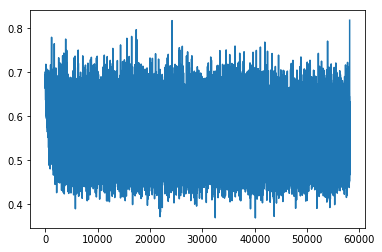

In [392]:
plt.plot(loss_values), len(loss_values)

In [3]:
# torch.save(model.state_dict(), 'dotprod_scratch_binary_genre')
model = torch.load('dotprod_scratch_binary_genre')

In [15]:
model['g_weight.weight'].shape,model['i_weight.weight'].shape

(torch.Size([39, 40]), torch.Size([42417, 40]))

In [23]:
#has to be switched to double because the weights are small
model['g_weight.weight'][0].double()*model['i_weight.weight'][0].double()

tensor([ 1.0061e-78, -3.2902e-74,  2.6631e-76,  7.9692e-76, -4.4170e-78,
         5.6890e-79, -1.5271e-76,  1.5102e-76, -2.3824e-76,  5.2792e-76,
        -4.4444e-76,  5.8679e-78,  3.9012e-76,  1.8630e-76,  3.2647e-76,
         1.5856e-76,  3.2543e-77,  2.5707e-76, -1.8894e-76,  6.7292e-75,
         3.4491e-76,  5.7911e-76,  2.0474e-77, -3.4806e-76, -8.4023e-78,
        -1.2523e-76, -2.7095e-77, -3.4382e-76,  2.2747e-76,  6.4512e-76,
         4.3070e-76,  1.8144e-77, -1.4096e-77,  2.1362e-77, -3.7390e-76,
         3.6326e-76,  1.6309e-76, -3.0826e-76, -1.1566e-76,  6.6517e-76],
       dtype=torch.float64)

In [49]:
def prod_genre_combo(i_index, g_index):
    prod_tensor = model['i_weight.weight'][i_index].double()
    genre_tensor = model['g_weight.weight'][g_index].double()
    return prod_tensor*genre_tensor
prod_genre_combo(1,1)

tensor([ 2.2582e-76, -2.3051e-77, -3.9515e-77, -1.0806e-76, -9.4767e-79,
         7.5749e-77,  1.3270e-76, -5.3199e-76,  6.3830e-76, -1.4507e-76,
        -3.2140e-76, -3.7531e-76,  4.2821e-77, -6.9886e-77,  4.2521e-76,
        -1.4771e-76,  1.7996e-76,  1.1776e-76,  4.8883e-76, -5.2302e-79,
         8.0720e-76, -3.5214e-77, -3.9647e-76, -2.7119e-76, -2.3857e-76,
         2.0986e-76,  1.4216e-76,  9.6566e-77, -5.3215e-76,  1.8204e-76,
        -3.5914e-76, -2.2252e-76,  5.5645e-76,  2.2787e-77, -6.1259e-77,
         1.9684e-77,  4.6627e-76, -1.6878e-77, -3.8166e-76, -3.3424e-76],
       dtype=torch.float64)

In [54]:
model['i_weight.weight'].size()

torch.Size([42417, 40])

In [75]:
prod_genre = a_w_negs[['prodID','genreID']].drop_duplicates().sort_values('prodID')
len(prod_genre)

42417

In [118]:
test = prod_genre.groupby('prodID')['genreID'].count().rename('n').reset_index()
len(test[test['n']==1])

36162

In [109]:
a_w_negs[a_w_negs['prodID']==2651].head()

reviewerID  prodID  purchase_flag  genreID
902194          71  2651.0              1        9
902195          71  2651.0              1        7
902196          71  2651.0              1        5
902197          71  2651.0              1       15
902198          71  2651.0              1        8

In [108]:
a[a['prodID']==2651].head()

reviewerID  prodID  overall      title
46838       20436    2651      3.0  Anthology
46839       20437    2651      4.0  Anthology
46840         809    2651      4.0  Anthology
46841       20423    2651      2.0  Anthology
46842       17174    2651      4.0  Anthology

In [99]:
x = torch.empty(size=(len(prod_genre), 40))
for i in range(len(prod_genre)-1):
    x[i] = prod_genre_combo(i,prod_genre['genreID'].iloc[i])

IndexError: index 42417 is out of bounds for dimension 0 with size 42417

In [73]:
range(len(prod_genre)-1)

range(0, 56584)

In [70]:
prod_genre_combo(42416,prod_genre['genreID'].iloc[42416])

tensor([-3.2972e-76, -6.4218e-76,  3.6785e-76, -2.7106e-77, -1.8328e-77,
        -4.9016e-76, -4.8853e-77,  4.8926e-77,  4.0718e-76, -1.5993e-77,
        -3.9545e-77, -2.1793e-77, -9.0103e-77,  1.1304e-77, -2.9023e-77,
        -3.7525e-76,  6.4318e-77, -3.2576e-76,  1.3856e-76,  1.4490e-75,
         1.0201e-76, -3.7066e-76, -9.6017e-77,  1.9505e-76,  4.9663e-76,
        -1.8400e-77,  1.2402e-76, -1.5885e-76,  8.0044e-77,  3.4467e-76,
        -1.1775e-76,  2.5542e-76, -5.2376e-76, -3.1627e-76,  1.2692e-77,
         9.0819e-78, -1.7659e-78,  3.7388e-76,  5.6618e-76, -3.3717e-76],
       dtype=torch.float64)

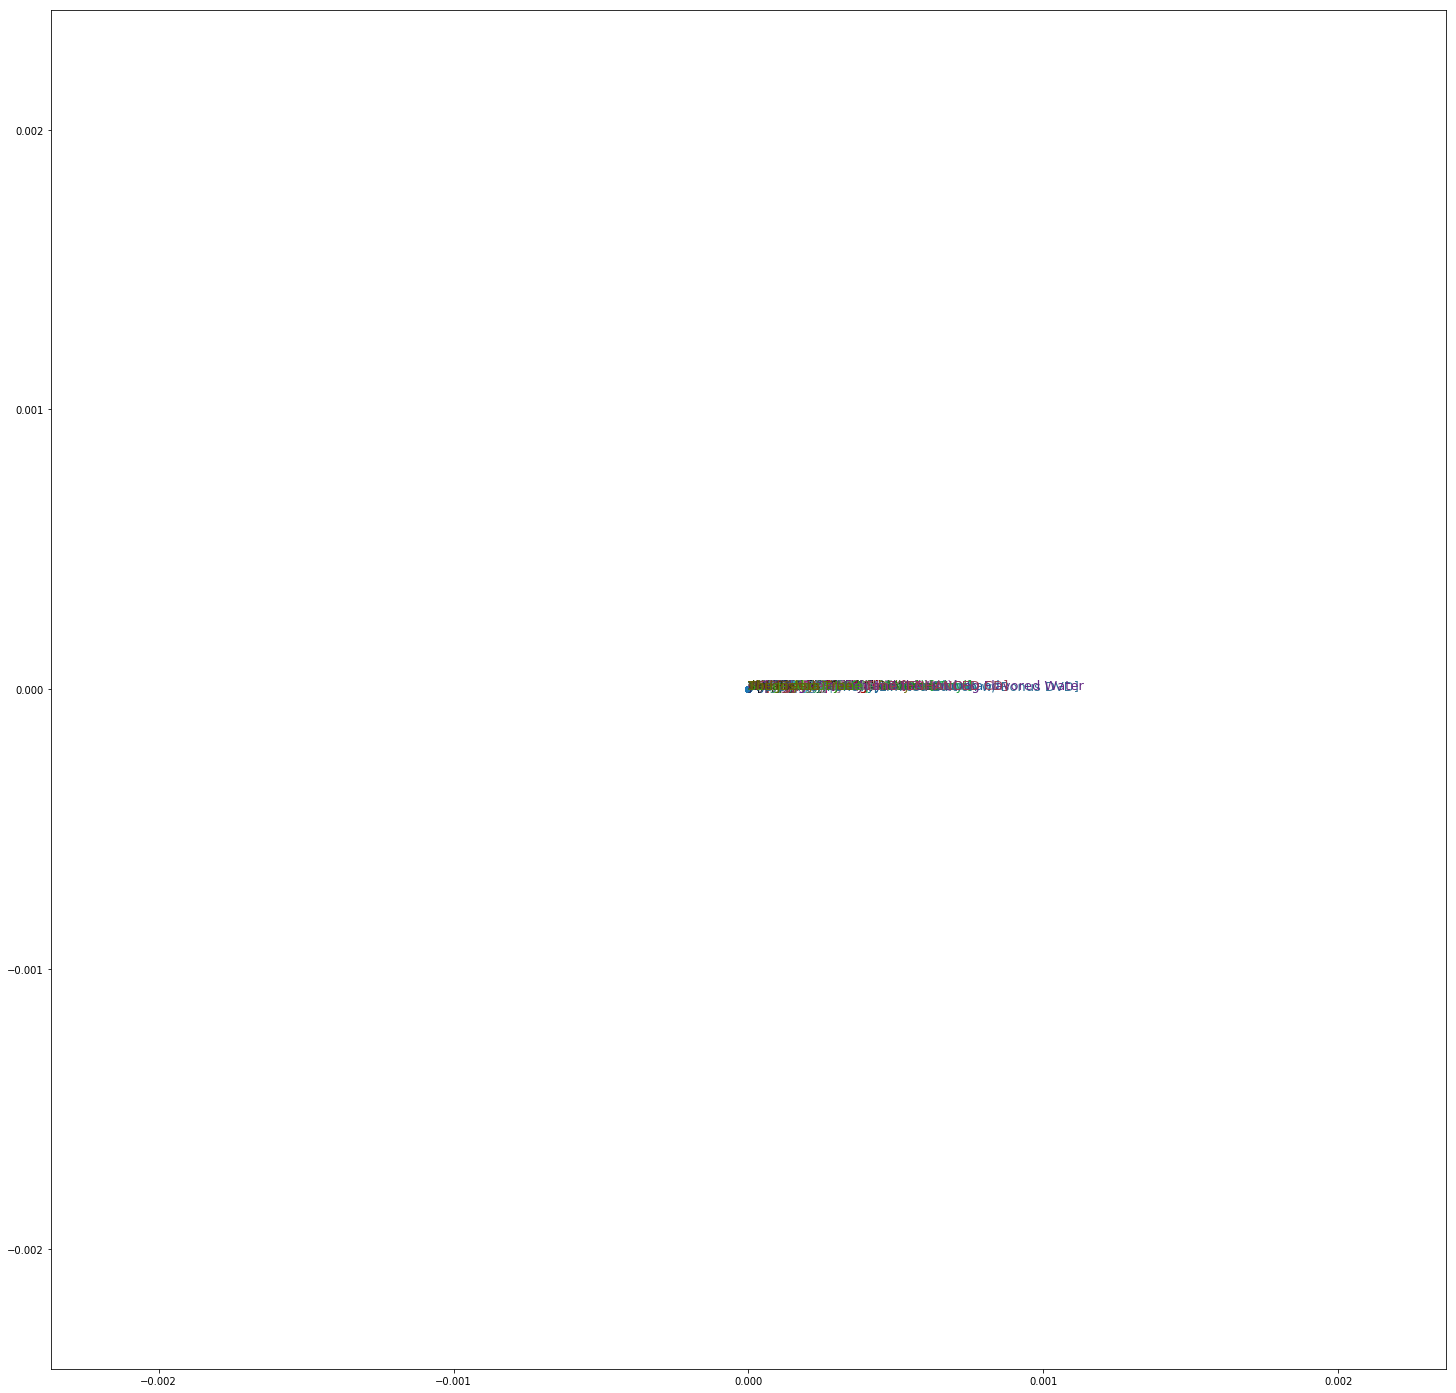

In [6]:
df_music = pd.read_pickle('merged_album_data.pkl')
df_music = df_music[~(df_music['title'].isnull())]
df_music['reviewerID'] = df_music['reviewerID'].apply(lambda x: users_index[x]).astype('int')
df_music['prodID'] = df_music['title'].apply(lambda x: prod_index[x]).astype('int')
g = df_music.groupby('title')['overall'].count()
top_music = g.sort_values(ascending=False).index.values[:1000]
users_w = model['u_weight.weight']
items_w = model['i_weight.weight']
music_index = dict(zip(df_music['title'], df_music['prodID']))

#from fastai - torch pca
def _pca(x, k=2):
    "Compute PCA of `x` with `k` dimensions."
    x = x-torch.mean(x,0)
    U,S,V = torch.svd(x.t())
    return torch.mm(x,U[:,:k])
torch.Tensor.pca = _pca

def generate_embedding_plot(top=500):
    g = df_music.groupby('title')['overall'].count()
    #grab top music
    top_music = g.sort_values(ascending=False).index.values[:top]
    top_music_w = items_w[[music_index[x] for x in top_music.tolist()]]
    #reduce the dimensions from 40 to 2
    top_music_w_pca = top_music_w.detach().pca(2)
    fac0,fac1 = top_music_w_pca.t()
    music_comp = [(f, i) for f,i in zip(fac0, top_music)]
    
    #produce plot
    idxs = np.random.choice(len(top_music), 300, replace=False)
    idxs = list(range(100))
    X = fac0[idxs]
    Y = fac1[idxs]
    plt.figure(figsize=(25,25))
    plt.scatter(X, Y,clip_on=True)
    for i, x, y in zip(top_music[idxs], X, Y):
        plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=13,clip_on=True)
generate_embedding_plot()    

# Inference
- Predict what album i will like given a few examples

### From simple Embedding to Autoencoder
- Note that thus far we have not done any 'real' deep learning. We've only dropped some data into a higher dimension space and learned distances and similarities between the data points in this new space (an embedding).
https://www.quora.com/What-is-the-difference-between-an-embedding-and-the-hidden-layer-of-an-autoencoder